In [61]:
import numpy as np
import librosa
import sklearn
import pandas
import python_speech_features
import os
import scipy.io.wavfile as wav
from audiolazy import lazy_lpc
import pandas as pd
from sklearn.svm import SVC
from sklearn.utils import shuffle
import keras

Using TensorFlow backend.


In [3]:
subdirectories=os.listdir(os.getcwd() + "/genres")
subdirectories

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [4]:
path_of_audios=[]
lables=[]
len_of_each_genre=[]
prev=0
for subdirectory in subdirectories:
    path_of_audio=librosa.util.find_files(os.getcwd() + "/genres" + "/" + subdirectory)
    path_of_audios+=path_of_audio
    l=[subdirectory]*(len(path_of_audios)-prev)
    prev=len(path_of_audios)
    lables+=l
    len_of_each_genre.append(len(l))


In [5]:
len_of_each_genre

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [6]:
audios=[]
for path_of_audio in path_of_audios:
    signal,sampling_rate=librosa.load(path_of_audio,duration=5.0)
    audios.append(signal)

audios=np.array(audios)
audios.shape

(1000, 110250)

In [7]:
zero_crossings_rates=[]
for audio in audios:
    zero_crossings_rate=librosa.feature.zero_crossing_rate(y=audio)
    zero_crossings_rates.append(zero_crossings_rate[0])
    

In [8]:
zero_crossings_rates=np.array(zero_crossings_rates)
zero_crossings_rates.shape

(1000, 216)

In [9]:
mfccs=[]
for audio in audios:
    mfcc=librosa.feature.mfcc(y=audio,n_mfcc=13)
    mfccs.append(mfcc)
mfccs=np.array(mfccs)
mfccs.shape


(1000, 13, 216)

In [10]:
spectral_rolloffs=[]
for audio in audios:
    spectral_rolloff=librosa.feature.spectral_rolloff(y=audio)
    spectral_rolloffs.append(spectral_rolloff[0])
spectral_rolloffs=np.array(spectral_rolloffs)
spectral_rolloffs.shape

(1000, 216)

In [11]:
spectral_centroids=[]
for audio in audios:
    spectral_centroid=librosa.feature.spectral_centroid(y=audio)
    spectral_centroids.append(spectral_centroid[0])

spectral_centroids=np.array(spectral_centroids)
spectral_centroids.shape

(1000, 216)

In [12]:
spectral_bandwidths=[]
for audio in audios:
    spectral_bandwidth=librosa.feature.spectral_bandwidth(audio)
    spectral_bandwidths.append(spectral_bandwidth[0])

spectral_bandwidths=np.array(spectral_bandwidths)
spectral_bandwidths.shape

(1000, 216)

In [122]:
chroma_features=[]
for audio in audios:
    y_harmonic, y_percussive = librosa.effects.hpss(audio)
    tempo, beat_frames = librosa.beat.beat_track(y=y_percussive)
    mfcc = librosa.feature.mfcc(y=audio)
    mfcc_delta = librosa.feature.delta(mfcc)
    beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)
    chromagram = librosa.feature.chroma_cqt(y=y_harmonic)
    chroma_features.append(chromagram)
    

chroma_features.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


AttributeError: 'list' object has no attribute 'shape'

In [124]:
chroma_features=np.array(chroma_features)
chroma_features.shape

(1000, 12, 216)

In [163]:
mfcc_deltas=[]
for audio in audios:
    mfcc=librosa.feature.mfcc(y=audio,n_mfcc=13)
    mfcc_delta=librosa.feature.delta(mfcc)
    mfcc_deltas.append(mfcc_delta)

mfcc_deltas=np.array(mfcc_deltas)
mfcc_deltas.shape

(1000, 13, 216)

In [277]:
feature_vector=[]

for i in range(len(audios)):
    single_feature=[]
    single_feature.append(zero_crossings_rates[i].mean())
    single_feature.append(zero_crossings_rates[i].std())
    single_feature.append(spectral_rolloffs[i].mean())
    single_feature.append(spectral_rolloffs[i].std())
    single_feature.append(spectral_centroids[i].mean())
    single_feature.append(spectral_centroids[i].std())
    single_feature.append(spectral_bandwidths[i].mean())
    single_feature.append(spectral_bandwidths[i].std())
    for j in range(13):
        single_feature.append(mfccs[i,j].mean())
        single_feature.append(mfccs[i,j].std())
      #  single_feature.append(mfcc_deltas[i,j].mean())
       # single_feature.append(mfcc_deltas[i,j].std())
    #for k in range(12):
     #   single_feature.append(chroma_features[i,k].mean())
      #  single_feature.append(chroma_features[i,k].std())
    
    feature_vector.append(single_feature)
        

feature_vector=np.array(feature_vector)
feature_vector.shape

(1000, 34)

In [278]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
feature_vector=scaler.fit_transform(feature_vector)
dataset_pandas=pd.DataFrame(feature_vector)
dataset_pandas['genre']=lables
dataset_pandas.to_csv("data_set2.csv", index=False)

In [279]:
dataset_pandas.shape

(1000, 35)

In [280]:
data=pd.read_csv('data_set2.csv')

In [281]:
data=shuffle(data)

In [410]:
data_set_np=np.array(data)
X = data_set_np[:,:-1]
Y = data_set_np[:,-1]

In [473]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
le.classes_
Y=le.transform(Y)
le.inverse_transform([0,1,2,3,4,5,6,7,8,9])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [474]:
le.inverse_transform([1,2,3])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['classical', 'country', 'disco'], dtype=object)

In [475]:
X.shape

(1000, 34)

In [476]:
Y.shape

(1000,)

In [477]:

Y

array([4, 6, 7, 9, 5, 9, 3, 8, 4, 0, 6, 8, 7, 3, 2, 8, 6, 6, 8, 4, 7, 4,
       6, 9, 4, 5, 8, 6, 4, 2, 7, 0, 2, 6, 7, 1, 1, 8, 9, 4, 1, 5, 1, 5,
       1, 4, 8, 7, 4, 8, 0, 4, 2, 7, 5, 7, 6, 8, 0, 1, 3, 0, 4, 0, 9, 1,
       7, 7, 2, 0, 6, 5, 0, 5, 1, 9, 4, 1, 6, 8, 2, 3, 4, 2, 6, 1, 7, 4,
       5, 8, 3, 1, 4, 2, 3, 1, 6, 5, 8, 1, 2, 1, 1, 2, 0, 1, 8, 8, 4, 1,
       8, 8, 0, 8, 4, 1, 9, 6, 1, 5, 8, 1, 4, 3, 2, 8, 3, 4, 4, 7, 1, 7,
       8, 7, 1, 4, 4, 1, 3, 7, 7, 0, 7, 5, 2, 8, 7, 3, 7, 1, 2, 8, 9, 0,
       9, 1, 7, 2, 9, 1, 6, 2, 8, 5, 4, 9, 7, 7, 9, 7, 9, 4, 8, 5, 5, 0,
       0, 3, 2, 2, 4, 6, 0, 9, 3, 3, 9, 6, 9, 4, 5, 8, 0, 2, 8, 7, 3, 6,
       4, 2, 6, 2, 5, 1, 5, 4, 3, 0, 9, 0, 2, 7, 3, 8, 5, 3, 7, 1, 0, 3,
       5, 2, 3, 4, 9, 3, 0, 4, 0, 2, 1, 1, 7, 0, 5, 4, 8, 0, 5, 2, 9, 6,
       8, 3, 9, 3, 1, 7, 9, 4, 5, 2, 3, 4, 9, 0, 6, 8, 1, 3, 7, 9, 8, 3,
       7, 3, 2, 3, 5, 3, 6, 2, 3, 3, 5, 9, 0, 2, 3, 4, 2, 8, 7, 9, 1, 6,
       6, 9, 6, 0, 3, 4, 1, 7, 3, 3, 3, 5, 9, 7, 8,

In [478]:
X_train=X[:800]
Y_train=Y[:800]
X_test=X[800:]
Y_test=Y[800:]
clf=SVC(C=1000)

In [479]:
clf=SVC(C=1000,kernel='poly')

In [480]:
from sklearn.model_selection import cross_val_score

In [481]:
score=cross_val_score(clf, X, Y, cv=10)

In [482]:
score

array([0.64, 0.77, 0.69, 0.7 , 0.63, 0.72, 0.58, 0.67, 0.6 , 0.6 ])

In [483]:
from sklearn.naive_bayes import GaussianNB

In [484]:
clf=GaussianNB()

In [485]:
score=cross_val_score(clf, X, Y, cv=10)

In [486]:
score

array([0.44, 0.55, 0.5 , 0.48, 0.47, 0.46, 0.51, 0.46, 0.51, 0.45])

In [487]:
from sklearn.linear_model import LogisticRegression

In [488]:
clf=LogisticRegression()

In [489]:
score=cross_val_score(clf, X, Y, cv=5)
score

array([0.58 , 0.625, 0.61 , 0.55 , 0.555])

In [490]:
from sklearn.tree import DecisionTreeClassifier

In [491]:
clf=DecisionTreeClassifier()

In [492]:
score=cross_val_score(clf, X, Y, cv=10)
score

array([0.41, 0.46, 0.42, 0.46, 0.45, 0.4 , 0.4 , 0.48, 0.43, 0.36])

In [493]:
from sklearn import neighbors

In [494]:
clf=neighbors.KNeighborsClassifier()

In [495]:
score=cross_val_score(clf, X, Y, cv=10)
score

array([0.57, 0.67, 0.6 , 0.58, 0.65, 0.54, 0.5 , 0.61, 0.61, 0.53])

In [496]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [497]:
clf=QuadraticDiscriminantAnalysis()

In [498]:
score=cross_val_score(clf, X, Y, cv=10)
score

array([0.5 , 0.65, 0.6 , 0.57, 0.63, 0.59, 0.5 , 0.62, 0.58, 0.46])

In [186]:
y_temp = keras.utils.to_categorical(Y,num_classes=10)

In [64]:
import keras
from keras.layers import Dense, add
from keras.models import Sequential
from keras import optimizers
import keras.utils
from sklearn.model_selection import KFold


kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf)  
def create_model():
    model = Sequential()
    model.add(Dense(56,input_shape=(34,)))
    model.add(Dense(52,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizers.Adam(lr=0.005),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
for train_index, test_index in kf.split(X):
   #print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y_temp[train_index], y_temp[test_index]
   clf = create_model()
   clf.fit(X_train, y_train, epochs=200, batch_size=32)
   print(clf.evaluate(X_test,y_test))

KFold(n_splits=5, random_state=None, shuffle=False)


Epoch 1/200


 32/800 [>.............................] - ETA: 12s - loss: 2.3585 - acc: 0.1250

800/800 [==============================] - 1s 693us/step - loss: 2.0902 - acc: 0.2587


Epoch 2/200
 32/800 [>.............................] - ETA: 0s - loss: 1.9585 - acc: 0.3438

800/800 [==============================] - 0s 57us/step - loss: 1.6559 - acc: 0.3825


Epoch 3/200
 32/800 [>.............................] - ETA: 0s - loss: 1.4406 - acc: 0.4688

768/800 [===========================>..] - ETA: 0s - loss: 1.4630 - acc: 0.4518

800/800 [==============================] - 0s 69us/step - loss: 1.4581 - acc: 0.4550


Epoch 4/200
 32/800 [>.............................] - ETA: 0s - loss: 1.3162 - acc: 0.4688

672/800 [========================>.....] - ETA: 0s - loss: 1.3544 - acc: 0.5164

800/800 [==============================] - 0s 86us/step - loss: 1.3355 - acc: 0.5212


Epoch 5/200
 32/800 [>.............................] - ETA: 0s - loss: 1.4810 - acc: 0.4062

768/800 [===========================>..] - ETA: 0s - loss: 1.2505 - acc: 0.5417

800/800 [==============================] - 0s 72us/step - loss: 1.2584 - acc: 0.5375


Epoch 6/200
 32/800 [>.............................] - ETA: 0s - loss: 1.3449 - acc: 0.4688

768/800 [===========================>..] - ETA: 0s - loss: 1.1983 - acc: 0.5469

800/800 [==============================] - 0s 70us/step - loss: 1.1853 - acc: 0.5538


Epoch 7/200
 32/800 [>.............................] - ETA: 0s - loss: 1.0262 - acc: 0.5938

512/800 [==================>...........] - ETA: 0s - loss: 1.0903 - acc: 0.5898

800/800 [==============================] - 0s 93us/step - loss: 1.1202 - acc: 0.5825


Epoch 8/200
 32/800 [>.............................] - ETA: 0s - loss: 1.2159 - acc: 0.5000

608/800 [=====================>........] - ETA: 0s - loss: 1.1090 - acc: 0.5938

800/800 [==============================] - 0s 89us/step - loss: 1.0739 - acc: 0.6013


Epoch 9/200
 32/800 [>.............................] - ETA: 0s - loss: 0.9528 - acc: 0.5625

672/800 [========================>.....] - ETA: 0s - loss: 1.0114 - acc: 0.6176

800/800 [==============================] - 0s 80us/step - loss: 0.9980 - acc: 0.6238


Epoch 10/200
 32/800 [>.............................] - ETA: 0s - loss: 0.9813 - acc: 0.6875

768/800 [===========================>..] - ETA: 0s - loss: 0.9720 - acc: 0.6432

800/800 [==============================] - 0s 73us/step - loss: 0.9848 - acc: 0.6375


Epoch 11/200


 32/800 [>.............................] - ETA: 0s - loss: 0.6769 - acc: 0.7500

736/800 [==========================>...] - ETA: 0s - loss: 0.9697 - acc: 0.6603

800/800 [==============================] - 0s 78us/step - loss: 0.9701 - acc: 0.6675


Epoch 12/200
 32/800 [>.............................] - ETA: 0s - loss: 1.0249 - acc: 0.5625

576/800 [====================>.........] - ETA: 0s - loss: 0.8963 - acc: 0.6667

800/800 [==============================] - 0s 96us/step - loss: 0.8899 - acc: 0.6737


Epoch 13/200
 32/800 [>.............................] - ETA: 0s - loss: 1.2575 - acc: 0.4375

704/800 [=========================>....] - ETA: 0s - loss: 0.8624 - acc: 0.6847

800/800 [==============================] - 0s 81us/step - loss: 0.8644 - acc: 0.6850


Epoch 14/200
 32/800 [>.............................] - ETA: 0s - loss: 1.0932 - acc: 0.5625

704/800 [=========================>....] - ETA: 0s - loss: 0.7843 - acc: 0.7159

800/800 [==============================] - 0s 79us/step - loss: 0.7861 - acc: 0.7162


Epoch 15/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7518 - acc: 0.7500

608/800 [=====================>........] - ETA: 0s - loss: 0.7557 - acc: 0.7336

800/800 [==============================] - 0s 91us/step - loss: 0.7697 - acc: 0.7275


Epoch 16/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5022 - acc: 0.8438

672/800 [========================>.....] - ETA: 0s - loss: 0.7513 - acc: 0.7500

800/800 [==============================] - 0s 84us/step - loss: 0.7568 - acc: 0.7450


Epoch 17/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7358 - acc: 0.6562

736/800 [==========================>...] - ETA: 0s - loss: 0.7612 - acc: 0.7391

800/800 [==============================] - 0s 76us/step - loss: 0.7575 - acc: 0.7413


Epoch 18/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3681 - acc: 0.9375

800/800 [==============================] - 0s 66us/step - loss: 0.7200 - acc: 0.7612


Epoch 19/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6648 - acc: 0.8125

704/800 [=========================>....] - ETA: 0s - loss: 0.6659 - acc: 0.7614

800/800 [==============================] - 0s 72us/step - loss: 0.6854 - acc: 0.7550


Epoch 20/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8583 - acc: 0.6250

704/800 [=========================>....] - ETA: 0s - loss: 0.6575 - acc: 0.7486

800/800 [==============================] - 0s 74us/step - loss: 0.6569 - acc: 0.7462


Epoch 21/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5123 - acc: 0.8438

800/800 [==============================] - 0s 67us/step - loss: 0.6729 - acc: 0.7725


Epoch 22/200
 32/800 [>.............................] - ETA: 0s - loss: 0.9085 - acc: 0.7188

608/800 [=====================>........] - ETA: 0s - loss: 0.6666 - acc: 0.7730

800/800 [==============================] - 0s 82us/step - loss: 0.6548 - acc: 0.7750


Epoch 23/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5975 - acc: 0.7500

736/800 [==========================>...] - ETA: 0s - loss: 0.5947 - acc: 0.7840

800/800 [==============================] - 0s 75us/step - loss: 0.6012 - acc: 0.7863


Epoch 24/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6584 - acc: 0.7188

768/800 [===========================>..] - ETA: 0s - loss: 0.5826 - acc: 0.7773

800/800 [==============================] - 0s 71us/step - loss: 0.5769 - acc: 0.7825


Epoch 25/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3730 - acc: 0.8750

800/800 [==============================] - 0s 66us/step - loss: 0.5525 - acc: 0.8013


Epoch 26/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6162 - acc: 0.6875

800/800 [==============================] - 0s 62us/step - loss: 0.5020 - acc: 0.8188


Epoch 27/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4756 - acc: 0.8125

800/800 [==============================] - 0s 65us/step - loss: 0.4936 - acc: 0.8150


Epoch 28/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3771 - acc: 0.8750

672/800 [========================>.....] - ETA: 0s - loss: 0.4408 - acc: 0.8393

800/800 [==============================] - 0s 74us/step - loss: 0.4605 - acc: 0.8325


Epoch 29/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3579 - acc: 0.8750

736/800 [==========================>...] - ETA: 0s - loss: 0.4679 - acc: 0.8220

800/800 [==============================] - 0s 72us/step - loss: 0.4711 - acc: 0.8225


Epoch 30/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3798 - acc: 0.8750

768/800 [===========================>..] - ETA: 0s - loss: 0.4773 - acc: 0.8216

800/800 [==============================] - 0s 69us/step - loss: 0.4852 - acc: 0.8188


Epoch 31/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2346 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.4242 - acc: 0.8477

800/800 [==============================] - 0s 70us/step - loss: 0.4352 - acc: 0.8425


Epoch 32/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3036 - acc: 0.9062

800/800 [==============================] - 0s 66us/step - loss: 0.4296 - acc: 0.8400


Epoch 33/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2333 - acc: 0.9375

768/800 [===========================>..] - ETA: 0s - loss: 0.3870 - acc: 0.8503

800/800 [==============================] - 0s 69us/step - loss: 0.3919 - acc: 0.8475


Epoch 34/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2148 - acc: 0.9375

800/800 [==============================] - 0s 66us/step - loss: 0.4152 - acc: 0.8400


Epoch 35/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5785 - acc: 0.7500

800/800 [==============================] - 0s 60us/step - loss: 0.4956 - acc: 0.8038


Epoch 36/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2447 - acc: 0.9375

800/800 [==============================] - 0s 65us/step - loss: 0.4404 - acc: 0.8387


Epoch 37/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3623 - acc: 0.8438

704/800 [=========================>....] - ETA: 0s - loss: 0.3381 - acc: 0.8693

800/800 [==============================] - 0s 72us/step - loss: 0.3441 - acc: 0.8650


Epoch 38/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3416 - acc: 0.9062

736/800 [==========================>...] - ETA: 0s - loss: 0.3256 - acc: 0.8750

800/800 [==============================] - 0s 71us/step - loss: 0.3229 - acc: 0.8775


Epoch 39/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4390 - acc: 0.8438

800/800 [==============================] - 0s 65us/step - loss: 0.2819 - acc: 0.8900


Epoch 40/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1789 - acc: 0.9375

608/800 [=====================>........] - ETA: 0s - loss: 0.2530 - acc: 0.9145

800/800 [==============================] - 0s 81us/step - loss: 0.2658 - acc: 0.9125


Epoch 41/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1725 - acc: 0.9062

704/800 [=========================>....] - ETA: 0s - loss: 0.2097 - acc: 0.9247

800/800 [==============================] - 0s 76us/step - loss: 0.2200 - acc: 0.9225


Epoch 42/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2700 - acc: 0.8750

736/800 [==========================>...] - ETA: 0s - loss: 0.2577 - acc: 0.9103

800/800 [==============================] - 0s 71us/step - loss: 0.2784 - acc: 0.9000


Epoch 43/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2066 - acc: 0.9062

736/800 [==========================>...] - ETA: 0s - loss: 0.2406 - acc: 0.9158

800/800 [==============================] - 0s 71us/step - loss: 0.2555 - acc: 0.9075


Epoch 44/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1738 - acc: 0.9375

800/800 [==============================] - 0s 65us/step - loss: 0.1964 - acc: 0.9363


Epoch 45/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0651 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.2129 - acc: 0.9387


Epoch 46/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0517 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.1947 - acc: 0.9276

800/800 [==============================] - 0s 73us/step - loss: 0.2023 - acc: 0.9225


Epoch 47/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1304 - acc: 0.9688

800/800 [==============================] - 0s 65us/step - loss: 0.2126 - acc: 0.9325


Epoch 48/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2900 - acc: 0.9062

800/800 [==============================] - 0s 64us/step - loss: 0.1974 - acc: 0.9312


Epoch 49/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0998 - acc: 0.9688

800/800 [==============================] - 0s 65us/step - loss: 0.1889 - acc: 0.9288


Epoch 50/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1697 - acc: 0.9375

800/800 [==============================] - 0s 64us/step - loss: 0.1787 - acc: 0.9400


Epoch 51/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0753 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.1319 - acc: 0.9600


Epoch 52/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0458 - acc: 1.0000

800/800 [==============================] - 0s 64us/step - loss: 0.1827 - acc: 0.9337


Epoch 53/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3510 - acc: 0.8438

800/800 [==============================] - 0s 65us/step - loss: 0.2330 - acc: 0.9138


Epoch 54/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3516 - acc: 0.9062

800/800 [==============================] - 0s 66us/step - loss: 0.3043 - acc: 0.8975


Epoch 55/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3238 - acc: 0.9062

672/800 [========================>.....] - ETA: 0s - loss: 0.4352 - acc: 0.8482

800/800 [==============================] - 0s 76us/step - loss: 0.4485 - acc: 0.8412


Epoch 56/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5865 - acc: 0.7500

672/800 [========================>.....] - ETA: 0s - loss: 0.4639 - acc: 0.8259

800/800 [==============================] - 0s 76us/step - loss: 0.4522 - acc: 0.8313


Epoch 57/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0795 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.2232 - acc: 0.9247

800/800 [==============================] - 0s 74us/step - loss: 0.2149 - acc: 0.9263


Epoch 58/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1233 - acc: 0.9688

512/800 [==================>...........] - ETA: 0s - loss: 0.2007 - acc: 0.9297

800/800 [==============================] - 0s 93us/step - loss: 0.2102 - acc: 0.9312


Epoch 59/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1955 - acc: 0.9062

640/800 [=======================>......] - ETA: 0s - loss: 0.1616 - acc: 0.9375

800/800 [==============================] - 0s 78us/step - loss: 0.1742 - acc: 0.9350


Epoch 60/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0877 - acc: 0.9375

672/800 [========================>.....] - ETA: 0s - loss: 0.1130 - acc: 0.9643

800/800 [==============================] - 0s 75us/step - loss: 0.1258 - acc: 0.9625


Epoch 61/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0647 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.1094 - acc: 0.9606

800/800 [==============================] - 0s 72us/step - loss: 0.1128 - acc: 0.9600


Epoch 62/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0332 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0726 - acc: 0.9766

800/800 [==============================] - 0s 70us/step - loss: 0.0731 - acc: 0.9750


Epoch 63/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0510 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0523 - acc: 0.9901

800/800 [==============================] - 0s 77us/step - loss: 0.0495 - acc: 0.9900


Epoch 64/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0192 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0404 - acc: 0.9918

800/800 [==============================] - 0s 70us/step - loss: 0.0415 - acc: 0.9925


Epoch 65/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0352 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0489 - acc: 0.9888


Epoch 66/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0330 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0414 - acc: 0.9913


Epoch 67/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0585 - acc: 0.9688

800/800 [==============================] - 0s 60us/step - loss: 0.0350 - acc: 0.9900


Epoch 68/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0057 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0455 - acc: 0.9837

800/800 [==============================] - 0s 74us/step - loss: 0.0452 - acc: 0.9838


Epoch 69/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0473 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0557 - acc: 0.9838


Epoch 70/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1159 - acc: 0.9688

800/800 [==============================] - 0s 61us/step - loss: 0.0735 - acc: 0.9775


Epoch 71/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0832 - acc: 0.9688

800/800 [==============================] - 0s 61us/step - loss: 0.0723 - acc: 0.9812


Epoch 72/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0681 - acc: 0.9688

800/800 [==============================] - 0s 60us/step - loss: 0.0745 - acc: 0.9713


Epoch 73/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1066 - acc: 0.9375

800/800 [==============================] - 0s 67us/step - loss: 0.0645 - acc: 0.9825


Epoch 74/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0903 - acc: 0.9688

800/800 [==============================] - 0s 59us/step - loss: 0.2181 - acc: 0.9300


Epoch 75/200


 32/800 [>.............................] - ETA: 0s - loss: 0.7450 - acc: 0.8438

800/800 [==============================] - 0s 63us/step - loss: 0.3477 - acc: 0.8837


Epoch 76/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1537 - acc: 0.9375

608/800 [=====================>........] - ETA: 0s - loss: 0.2867 - acc: 0.9030

800/800 [==============================] - 0s 79us/step - loss: 0.3556 - acc: 0.8875


Epoch 77/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4578 - acc: 0.8750

736/800 [==========================>...] - ETA: 0s - loss: 0.3380 - acc: 0.8913

800/800 [==============================] - 0s 71us/step - loss: 0.3229 - acc: 0.8962


Epoch 78/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0883 - acc: 0.9688

768/800 [===========================>..] - ETA: 0s - loss: 0.2041 - acc: 0.9297

800/800 [==============================] - 0s 69us/step - loss: 0.2023 - acc: 0.9312


Epoch 79/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2553 - acc: 0.8750

800/800 [==============================] - 0s 65us/step - loss: 0.1446 - acc: 0.9438


Epoch 80/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0956 - acc: 0.9688

800/800 [==============================] - 0s 64us/step - loss: 0.0834 - acc: 0.9725


Epoch 81/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0562 - acc: 0.9688

800/800 [==============================] - 0s 60us/step - loss: 0.0465 - acc: 0.9900


Epoch 82/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0196 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0380 - acc: 0.9926

800/800 [==============================] - 0s 78us/step - loss: 0.0372 - acc: 0.9925


Epoch 83/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0252 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0318 - acc: 0.9946

800/800 [==============================] - 0s 70us/step - loss: 0.0308 - acc: 0.9950


Epoch 84/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0272 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0248 - acc: 0.9962


Epoch 85/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0209 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0183 - acc: 0.9975


Epoch 86/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0079 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0138 - acc: 0.9988


Epoch 87/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0056 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0092 - acc: 1.0000

800/800 [==============================] - 0s 76us/step - loss: 0.0107 - acc: 0.9988


Epoch 88/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0080 - acc: 1.0000

640/800 [=======================>......] - ETA: 0s - loss: 0.0099 - acc: 0.9984

800/800 [==============================] - 0s 79us/step - loss: 0.0102 - acc: 0.9988


Epoch 89/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0214 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0078 - acc: 1.0000

800/800 [==============================] - 0s 68us/step - loss: 0.0103 - acc: 0.9988


Epoch 90/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0154 - acc: 1.0000

800/800 [==============================] - 0s 64us/step - loss: 0.0125 - acc: 0.9975


Epoch 91/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0477 - acc: 0.9688

704/800 [=========================>....] - ETA: 0s - loss: 0.0160 - acc: 0.9957

800/800 [==============================] - 0s 77us/step - loss: 0.0153 - acc: 0.9962


Epoch 92/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0227 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0108 - acc: 0.9986

800/800 [==============================] - 0s 72us/step - loss: 0.0101 - acc: 0.9988


Epoch 93/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0061 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0087 - acc: 0.9986

800/800 [==============================] - 0s 84us/step - loss: 0.0082 - acc: 0.9988


Epoch 94/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0069 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0107 - acc: 0.9986

800/800 [==============================] - 0s 73us/step - loss: 0.0102 - acc: 0.9988


Epoch 95/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0047 - acc: 1.0000

640/800 [=======================>......] - ETA: 0s - loss: 0.0101 - acc: 0.9969

800/800 [==============================] - 0s 84us/step - loss: 0.0095 - acc: 0.9975


Epoch 96/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0045 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0109 - acc: 0.9973

800/800 [==============================] - 0s 72us/step - loss: 0.0103 - acc: 0.9975


Epoch 97/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 68us/step - loss: 0.0055 - acc: 1.0000


Epoch 98/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0079 - acc: 0.9988


Epoch 99/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0023 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0090 - acc: 0.9986

800/800 [==============================] - 0s 74us/step - loss: 0.0085 - acc: 0.9988


Epoch 100/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0035 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0075 - acc: 0.9986

800/800 [==============================] - 0s 77us/step - loss: 0.0101 - acc: 0.9975


Epoch 101/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0027 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0056 - acc: 0.9988


Epoch 102/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0023 - acc: 1.0000

800/800 [==============================] - 0s 64us/step - loss: 0.0044 - acc: 0.9988


Epoch 103/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0049 - acc: 0.9975


Epoch 104/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0030 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0057 - acc: 0.9986

800/800 [==============================] - 0s 79us/step - loss: 0.0052 - acc: 0.9988


Epoch 105/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0028 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.9987

800/800 [==============================] - 0s 70us/step - loss: 0.0056 - acc: 0.9988


Epoch 106/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0093 - acc: 0.9975


Epoch 107/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0063 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0099 - acc: 0.9975


Epoch 108/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0033 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0068 - acc: 0.9972

800/800 [==============================] - 0s 76us/step - loss: 0.0062 - acc: 0.9975


Epoch 109/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0076 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0050 - acc: 0.9988


Epoch 110/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0010 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0098 - acc: 0.9975


Epoch 111/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0045 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0058 - acc: 0.9987

800/800 [==============================] - 0s 73us/step - loss: 0.0056 - acc: 0.9988


Epoch 112/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0022 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0106 - acc: 0.9962


Epoch 113/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0093 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0119 - acc: 0.9974

800/800 [==============================] - 0s 76us/step - loss: 0.0116 - acc: 0.9975


Epoch 114/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0059 - acc: 0.9988


Epoch 115/200
 32/800 [>.............................] - ETA: 0s - loss: 7.2800e-04 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0106 - acc: 0.9962


Epoch 116/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0084 - acc: 0.9988


Epoch 117/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0036 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0373 - acc: 0.9905

800/800 [==============================] - 0s 75us/step - loss: 0.0410 - acc: 0.9875


Epoch 118/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0156 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0848 - acc: 0.9775


Epoch 119/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7726 - acc: 0.9062

800/800 [==============================] - 0s 67us/step - loss: 0.4148 - acc: 0.8900


Epoch 120/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2758 - acc: 0.9062

800/800 [==============================] - 0s 61us/step - loss: 1.0706 - acc: 0.7425


Epoch 121/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6641 - acc: 0.8125

800/800 [==============================] - 0s 64us/step - loss: 0.9494 - acc: 0.7250


Epoch 122/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5644 - acc: 0.6562

704/800 [=========================>....] - ETA: 0s - loss: 0.6084 - acc: 0.7741

800/800 [==============================] - 0s 76us/step - loss: 0.6489 - acc: 0.7700


Epoch 123/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6275 - acc: 0.7812

800/800 [==============================] - 0s 65us/step - loss: 0.5173 - acc: 0.8175


Epoch 124/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1393 - acc: 0.9688

800/800 [==============================] - 0s 66us/step - loss: 0.2508 - acc: 0.9088


Epoch 125/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1805 - acc: 0.9375

800/800 [==============================] - 0s 63us/step - loss: 0.1672 - acc: 0.9337


Epoch 126/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0787 - acc: 0.9688

768/800 [===========================>..] - ETA: 0s - loss: 0.1118 - acc: 0.9648

800/800 [==============================] - 0s 71us/step - loss: 0.1143 - acc: 0.9637


Epoch 127/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0566 - acc: 1.0000

800/800 [==============================] - 0s 69us/step - loss: 0.0983 - acc: 0.9713


Epoch 128/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0527 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0611 - acc: 0.9862


Epoch 129/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0376 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0464 - acc: 0.9896

800/800 [==============================] - 0s 81us/step - loss: 0.0482 - acc: 0.9888


Epoch 130/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0224 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0296 - acc: 0.9959

800/800 [==============================] - 0s 76us/step - loss: 0.0290 - acc: 0.9962


Epoch 131/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0117 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0191 - acc: 0.9973

800/800 [==============================] - 0s 72us/step - loss: 0.0186 - acc: 0.9975


Epoch 132/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0206 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0136 - acc: 0.9986

800/800 [==============================] - 0s 73us/step - loss: 0.0133 - acc: 0.9988


Epoch 133/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0089 - acc: 1.0000

800/800 [==============================] - 0s 69us/step - loss: 0.0115 - acc: 0.9988


Epoch 134/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0195 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0120 - acc: 0.9973

800/800 [==============================] - 0s 72us/step - loss: 0.0120 - acc: 0.9975


Epoch 135/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0070 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0109 - acc: 0.9973

800/800 [==============================] - 0s 75us/step - loss: 0.0105 - acc: 0.9975


Epoch 136/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0304 - acc: 0.9688

736/800 [==========================>...] - ETA: 0s - loss: 0.0080 - acc: 0.9973

800/800 [==============================] - 0s 75us/step - loss: 0.0079 - acc: 0.9975


Epoch 137/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0109 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0133 - acc: 0.9975


Epoch 138/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0631 - acc: 0.9688

768/800 [===========================>..] - ETA: 0s - loss: 0.0112 - acc: 0.9974

800/800 [==============================] - 0s 71us/step - loss: 0.0112 - acc: 0.9975


Epoch 139/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0020 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0082 - acc: 0.9974

800/800 [==============================] - 0s 71us/step - loss: 0.0080 - acc: 0.9975


Epoch 140/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0031 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0087 - acc: 0.9986

800/800 [==============================] - 0s 75us/step - loss: 0.0087 - acc: 0.9988


Epoch 141/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0126 - acc: 1.0000

800/800 [==============================] - 0s 69us/step - loss: 0.0072 - acc: 0.9988


Epoch 142/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0527 - acc: 0.9688

800/800 [==============================] - 0s 66us/step - loss: 0.0081 - acc: 0.9975


Epoch 143/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 70us/step - loss: 0.0060 - acc: 0.9988


Epoch 144/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0029 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0068 - acc: 0.9986

800/800 [==============================] - 0s 77us/step - loss: 0.0065 - acc: 0.9988


Epoch 145/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0020 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0055 - acc: 0.9988


Epoch 146/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

576/800 [====================>.........] - ETA: 0s - loss: 0.0043 - acc: 0.9983

800/800 [==============================] - 0s 92us/step - loss: 0.0050 - acc: 0.9975


Epoch 147/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0034 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0061 - acc: 0.9986

800/800 [==============================] - 0s 82us/step - loss: 0.0057 - acc: 0.9988


Epoch 148/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0025 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0057 - acc: 0.9986

800/800 [==============================] - 0s 80us/step - loss: 0.0055 - acc: 0.9988


Epoch 149/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0036 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.9986

800/800 [==============================] - 0s 77us/step - loss: 0.0056 - acc: 0.9988


Epoch 150/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0077 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.9986

800/800 [==============================] - 0s 75us/step - loss: 0.0070 - acc: 0.9975


Epoch 151/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0067 - acc: 0.9973

800/800 [==============================] - 0s 76us/step - loss: 0.0064 - acc: 0.9975


Epoch 152/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0028 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0047 - acc: 0.9985

800/800 [==============================] - 0s 77us/step - loss: 0.0043 - acc: 0.9988


Epoch 153/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.9986

800/800 [==============================] - 0s 73us/step - loss: 0.0049 - acc: 0.9988


Epoch 154/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0042 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.9987

800/800 [==============================] - 0s 73us/step - loss: 0.0048 - acc: 0.9988


Epoch 155/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0049 - acc: 0.9986

800/800 [==============================] - 0s 76us/step - loss: 0.0047 - acc: 0.9988


Epoch 156/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0043 - acc: 1.0000

640/800 [=======================>......] - ETA: 0s - loss: 0.0064 - acc: 0.9984

800/800 [==============================] - 0s 87us/step - loss: 0.0055 - acc: 0.9988


Epoch 157/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0029 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0030 - acc: 1.0000

800/800 [==============================] - 0s 79us/step - loss: 0.0037 - acc: 1.0000


Epoch 158/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0061 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0165 - acc: 0.9961

800/800 [==============================] - 0s 71us/step - loss: 0.0162 - acc: 0.9962


Epoch 159/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0068 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0425 - acc: 0.9836

800/800 [==============================] - 0s 83us/step - loss: 0.0456 - acc: 0.9838


Epoch 160/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1443 - acc: 0.9375

736/800 [==========================>...] - ETA: 0s - loss: 0.1299 - acc: 0.9538

800/800 [==============================] - 0s 77us/step - loss: 0.1419 - acc: 0.9513


Epoch 161/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3924 - acc: 0.9062

736/800 [==========================>...] - ETA: 0s - loss: 0.6235 - acc: 0.8424

800/800 [==============================] - 0s 78us/step - loss: 0.6381 - acc: 0.8438


Epoch 162/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5318 - acc: 0.8438

544/800 [===================>..........] - ETA: 0s - loss: 0.7452 - acc: 0.8051

800/800 [==============================] - 0s 90us/step - loss: 0.8016 - acc: 0.7787


Epoch 163/200


 32/800 [>.............................] - ETA: 0s - loss: 0.2422 - acc: 0.9062

704/800 [=========================>....] - ETA: 0s - loss: 0.6319 - acc: 0.7997

800/800 [==============================] - 0s 80us/step - loss: 0.6168 - acc: 0.8038


Epoch 164/200


 32/800 [>.............................] - ETA: 0s - loss: 0.2443 - acc: 0.9688

800/800 [==============================] - 0s 64us/step - loss: 0.4738 - acc: 0.8425


Epoch 165/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1604 - acc: 0.9688

800/800 [==============================] - 0s 69us/step - loss: 0.3626 - acc: 0.8600


Epoch 166/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3055 - acc: 0.9062

768/800 [===========================>..] - ETA: 0s - loss: 0.1846 - acc: 0.9466

800/800 [==============================] - 0s 71us/step - loss: 0.1841 - acc: 0.9487


Epoch 167/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1021 - acc: 0.9688

800/800 [==============================] - 0s 68us/step - loss: 0.0764 - acc: 0.9763


Epoch 168/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0633 - acc: 1.0000

640/800 [=======================>......] - ETA: 0s - loss: 0.1067 - acc: 0.9625

800/800 [==============================] - 0s 84us/step - loss: 0.1384 - acc: 0.9587


Epoch 169/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0791 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0933 - acc: 0.9836

800/800 [==============================] - 0s 78us/step - loss: 0.0890 - acc: 0.9838


Epoch 170/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0217 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0664 - acc: 0.9896

800/800 [==============================] - 0s 79us/step - loss: 0.0676 - acc: 0.9862


Epoch 171/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0298 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.1004 - acc: 0.9766

800/800 [==============================] - 0s 79us/step - loss: 0.0977 - acc: 0.9775


Epoch 172/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0807 - acc: 0.9688

672/800 [========================>.....] - ETA: 0s - loss: 0.0582 - acc: 0.9940

800/800 [==============================] - 0s 81us/step - loss: 0.0539 - acc: 0.9925


Epoch 173/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0086 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0404 - acc: 0.9975


Epoch 174/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0171 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0093 - acc: 1.0000

800/800 [==============================] - 0s 77us/step - loss: 0.0313 - acc: 0.9975


Epoch 175/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0064 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0104 - acc: 0.9986

800/800 [==============================] - 0s 75us/step - loss: 0.0329 - acc: 0.9962


Epoch 176/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5073 - acc: 0.9688

608/800 [=====================>........] - ETA: 0s - loss: 0.0383 - acc: 0.9967

800/800 [==============================] - 0s 84us/step - loss: 0.0305 - acc: 0.9975


Epoch 177/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0052 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0323 - acc: 0.9970

800/800 [==============================] - 0s 78us/step - loss: 0.0282 - acc: 0.9975


Epoch 178/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0034 - acc: 1.0000

640/800 [=======================>......] - ETA: 0s - loss: 0.0328 - acc: 0.9969

800/800 [==============================] - 0s 83us/step - loss: 0.0303 - acc: 0.9962


Epoch 179/200


 32/800 [>.............................] - ETA: 0s - loss: 7.3946e-04 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0297 - acc: 0.9974    

800/800 [==============================] - 0s 74us/step - loss: 0.0287 - acc: 0.9975


Epoch 180/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0312 - acc: 0.9955

800/800 [==============================] - 0s 78us/step - loss: 0.0265 - acc: 0.9962


Epoch 181/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0024 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0263 - acc: 0.9974

800/800 [==============================] - 0s 72us/step - loss: 0.0255 - acc: 0.9975


Epoch 182/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 69us/step - loss: 0.0264 - acc: 0.9962


Epoch 183/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0031 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0259 - acc: 0.9962


Epoch 184/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0027 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0285 - acc: 0.9970

800/800 [==============================] - 0s 78us/step - loss: 0.0249 - acc: 0.9975


Epoch 185/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5048 - acc: 0.9688

800/800 [==============================] - 0s 64us/step - loss: 0.0247 - acc: 0.9962


Epoch 186/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0031 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0246 - acc: 0.9962


Epoch 187/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0251 - acc: 0.9962


Epoch 188/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0036 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0253 - acc: 0.9975


Epoch 189/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

544/800 [===================>..........] - ETA: 0s - loss: 0.0068 - acc: 0.9982

800/800 [==============================] - 0s 85us/step - loss: 0.0255 - acc: 0.9975


Epoch 190/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 68us/step - loss: 0.0249 - acc: 0.9975


Epoch 191/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0031 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0274 - acc: 0.9962


Epoch 192/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0250 - acc: 0.9962


Epoch 193/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0022 - acc: 1.0000

800/800 [==============================] - 0s 78us/step - loss: 0.0246 - acc: 0.9975


Epoch 194/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5045 - acc: 0.9688

800/800 [==============================] - 0s 61us/step - loss: 0.0245 - acc: 0.9975


Epoch 195/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0011 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0238 - acc: 0.9986

800/800 [==============================] - 0s 81us/step - loss: 0.0239 - acc: 0.9975


Epoch 196/200
 32/800 [>.............................] - ETA: 0s - loss: 9.6141e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0252 - acc: 0.9975


Epoch 197/200
 32/800 [>.............................] - ETA: 0s - loss: 6.8315e-04 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0240 - acc: 0.9975


Epoch 198/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0013 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0244 - acc: 0.9975


Epoch 199/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0265 - acc: 0.9688

800/800 [==============================] - 0s 60us/step - loss: 0.0236 - acc: 0.9962


Epoch 200/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0011 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0239 - acc: 0.9962


 32/200 [===>..........................] - ETA: 0s

200/200 [==============================] - 0s 156us/step


[3.674064998626709, 0.585]


Epoch 1/200


 32/800 [>.............................] - ETA: 13s - loss: 2.3319 - acc: 0.1562

800/800 [==============================] - 1s 757us/step - loss: 2.0968 - acc: 0.2375


Epoch 2/200
 32/800 [>.............................] - ETA: 0s - loss: 1.9260 - acc: 0.2812

800/800 [==============================] - 0s 57us/step - loss: 1.6707 - acc: 0.3550


Epoch 3/200
 32/800 [>.............................] - ETA: 0s - loss: 1.4387 - acc: 0.3438

768/800 [===========================>..] - ETA: 0s - loss: 1.4561 - acc: 0.4453

800/800 [==============================] - 0s 70us/step - loss: 1.4511 - acc: 0.4500


Epoch 4/200
 32/800 [>.............................] - ETA: 0s - loss: 1.6304 - acc: 0.3750

704/800 [=========================>....] - ETA: 0s - loss: 1.3443 - acc: 0.4929

800/800 [==============================] - 0s 80us/step - loss: 1.3360 - acc: 0.4925


Epoch 5/200
 32/800 [>.............................] - ETA: 0s - loss: 1.1186 - acc: 0.5312

800/800 [==============================] - 0s 64us/step - loss: 1.2648 - acc: 0.5212


Epoch 6/200
 32/800 [>.............................] - ETA: 0s - loss: 1.2075 - acc: 0.5312

672/800 [========================>.....] - ETA: 0s - loss: 1.1930 - acc: 0.5432

800/800 [==============================] - 0s 80us/step - loss: 1.1857 - acc: 0.5513


Epoch 7/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8376 - acc: 0.6250

800/800 [==============================] - 0s 64us/step - loss: 1.0995 - acc: 0.5925


Epoch 8/200
 32/800 [>.............................] - ETA: 0s - loss: 1.0842 - acc: 0.5625

736/800 [==========================>...] - ETA: 0s - loss: 1.0194 - acc: 0.6277

800/800 [==============================] - 0s 72us/step - loss: 1.0208 - acc: 0.6313


Epoch 9/200
 32/800 [>.............................] - ETA: 0s - loss: 1.1629 - acc: 0.5625

800/800 [==============================] - 0s 63us/step - loss: 0.9687 - acc: 0.6438


Epoch 10/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8874 - acc: 0.6875

800/800 [==============================] - 0s 65us/step - loss: 0.9648 - acc: 0.6388


Epoch 11/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8187 - acc: 0.6875

736/800 [==========================>...] - ETA: 0s - loss: 0.9802 - acc: 0.6399

800/800 [==============================] - 0s 72us/step - loss: 0.9837 - acc: 0.6412


Epoch 12/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4931 - acc: 0.8438

672/800 [========================>.....] - ETA: 0s - loss: 0.9133 - acc: 0.6696

800/800 [==============================] - 0s 78us/step - loss: 0.9059 - acc: 0.6737


Epoch 13/200
 32/800 [>.............................] - ETA: 0s - loss: 0.9080 - acc: 0.6875

800/800 [==============================] - 0s 69us/step - loss: 0.8894 - acc: 0.6812


Epoch 14/200
 32/800 [>.............................] - ETA: 0s - loss: 1.1355 - acc: 0.5625

800/800 [==============================] - 0s 61us/step - loss: 0.8692 - acc: 0.6650


Epoch 15/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6836 - acc: 0.6562

800/800 [==============================] - 0s 61us/step - loss: 0.7943 - acc: 0.6975


Epoch 16/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5700 - acc: 0.7500

768/800 [===========================>..] - ETA: 0s - loss: 0.7435 - acc: 0.7227

800/800 [==============================] - 0s 73us/step - loss: 0.7490 - acc: 0.7200


Epoch 17/200
 32/800 [>.............................] - ETA: 0s - loss: 0.9947 - acc: 0.6250

800/800 [==============================] - 0s 65us/step - loss: 0.7477 - acc: 0.7225


Epoch 18/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6475 - acc: 0.7812

800/800 [==============================] - 0s 60us/step - loss: 0.7301 - acc: 0.7400


Epoch 19/200
 32/800 [>.............................] - ETA: 0s - loss: 0.9709 - acc: 0.6562

800/800 [==============================] - 0s 63us/step - loss: 0.6765 - acc: 0.7525


Epoch 20/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6042 - acc: 0.8125

800/800 [==============================] - 0s 60us/step - loss: 0.6043 - acc: 0.7875


Epoch 21/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5412 - acc: 0.7812

800/800 [==============================] - 0s 68us/step - loss: 0.5881 - acc: 0.7812


Epoch 22/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6320 - acc: 0.7812

768/800 [===========================>..] - ETA: 0s - loss: 0.6116 - acc: 0.7786

800/800 [==============================] - 0s 70us/step - loss: 0.6151 - acc: 0.7762


Epoch 23/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6205 - acc: 0.8125

800/800 [==============================] - 0s 60us/step - loss: 0.5910 - acc: 0.7925


Epoch 24/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3905 - acc: 0.8750

704/800 [=========================>....] - ETA: 0s - loss: 0.5108 - acc: 0.8139

800/800 [==============================] - 0s 73us/step - loss: 0.5347 - acc: 0.8100


Epoch 25/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4741 - acc: 0.8750

800/800 [==============================] - 0s 60us/step - loss: 0.5228 - acc: 0.8013


Epoch 26/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3894 - acc: 0.8750

800/800 [==============================] - 0s 61us/step - loss: 0.4992 - acc: 0.8212


Epoch 27/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3441 - acc: 0.9062

736/800 [==========================>...] - ETA: 0s - loss: 0.4624 - acc: 0.8383

800/800 [==============================] - 0s 75us/step - loss: 0.4719 - acc: 0.8337


Epoch 28/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3022 - acc: 0.9062

800/800 [==============================] - 0s 60us/step - loss: 0.4702 - acc: 0.8250


Epoch 29/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3257 - acc: 0.9062

800/800 [==============================] - 0s 59us/step - loss: 0.4789 - acc: 0.8175


Epoch 30/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4213 - acc: 0.8750

800/800 [==============================] - 0s 56us/step - loss: 0.4197 - acc: 0.8463


Epoch 31/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3766 - acc: 0.8125

800/800 [==============================] - 0s 57us/step - loss: 0.4499 - acc: 0.8337


Epoch 32/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3590 - acc: 0.8750

800/800 [==============================] - 0s 68us/step - loss: 0.3595 - acc: 0.8837


Epoch 33/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3064 - acc: 0.9375

800/800 [==============================] - 0s 67us/step - loss: 0.3216 - acc: 0.8888


Epoch 34/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3541 - acc: 0.8125

800/800 [==============================] - 0s 55us/step - loss: 0.2791 - acc: 0.8987


Epoch 35/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4107 - acc: 0.8438

800/800 [==============================] - 0s 56us/step - loss: 0.2920 - acc: 0.9000


Epoch 36/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1993 - acc: 0.9062

800/800 [==============================] - 0s 58us/step - loss: 0.2520 - acc: 0.9175


Epoch 37/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1383 - acc: 0.9688

768/800 [===========================>..] - ETA: 0s - loss: 0.2212 - acc: 0.9271

800/800 [==============================] - 0s 77us/step - loss: 0.2182 - acc: 0.9263


Epoch 38/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1735 - acc: 0.9375

800/800 [==============================] - 0s 56us/step - loss: 0.2453 - acc: 0.9100


Epoch 39/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3259 - acc: 0.9375

800/800 [==============================] - 0s 58us/step - loss: 0.2246 - acc: 0.9288


Epoch 40/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6745 - acc: 0.7188

800/800 [==============================] - 0s 53us/step - loss: 0.2155 - acc: 0.9263


Epoch 41/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1646 - acc: 0.9375

800/800 [==============================] - 0s 59us/step - loss: 0.1863 - acc: 0.9425


Epoch 42/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1753 - acc: 0.9375

800/800 [==============================] - 0s 62us/step - loss: 0.1581 - acc: 0.9525


Epoch 43/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0659 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.1896 - acc: 0.9337


Epoch 44/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1440 - acc: 0.9688

704/800 [=========================>....] - ETA: 0s - loss: 0.2025 - acc: 0.9290

800/800 [==============================] - 0s 76us/step - loss: 0.2137 - acc: 0.9250


Epoch 45/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6823 - acc: 0.8125

800/800 [==============================] - 0s 55us/step - loss: 0.3200 - acc: 0.8900


Epoch 46/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2474 - acc: 0.8438

800/800 [==============================] - 0s 60us/step - loss: 0.2835 - acc: 0.9113


Epoch 47/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3436 - acc: 0.8438

768/800 [===========================>..] - ETA: 0s - loss: 0.2918 - acc: 0.8971

800/800 [==============================] - 0s 71us/step - loss: 0.3014 - acc: 0.8938


Epoch 48/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3064 - acc: 0.8750

800/800 [==============================] - 0s 57us/step - loss: 0.3216 - acc: 0.8900


Epoch 49/200


 32/800 [>.............................] - ETA: 0s - loss: 0.2584 - acc: 0.8750

800/800 [==============================] - 0s 61us/step - loss: 0.2605 - acc: 0.8950


Epoch 50/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1207 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.2478 - acc: 0.9225


Epoch 51/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0615 - acc: 0.9688

800/800 [==============================] - 0s 56us/step - loss: 0.2154 - acc: 0.9237


Epoch 52/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1491 - acc: 0.9062

800/800 [==============================] - 0s 64us/step - loss: 0.1759 - acc: 0.9400


Epoch 53/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1212 - acc: 0.9688

800/800 [==============================] - 0s 61us/step - loss: 0.1733 - acc: 0.9363


Epoch 54/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0779 - acc: 0.9688

800/800 [==============================] - 0s 56us/step - loss: 0.1375 - acc: 0.9513


Epoch 55/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1572 - acc: 0.9062

800/800 [==============================] - 0s 58us/step - loss: 0.1225 - acc: 0.9675


Epoch 56/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1799 - acc: 0.9062

800/800 [==============================] - 0s 55us/step - loss: 0.1638 - acc: 0.9438


Epoch 57/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0672 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.2448 - acc: 0.9113


Epoch 58/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3162 - acc: 0.9062

800/800 [==============================] - 0s 64us/step - loss: 0.2272 - acc: 0.9237


Epoch 59/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1324 - acc: 0.9375

800/800 [==============================] - 0s 55us/step - loss: 0.1450 - acc: 0.9450


Epoch 60/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0461 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.1146 - acc: 0.9662


Epoch 61/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0881 - acc: 0.9688

800/800 [==============================] - 0s 61us/step - loss: 0.0784 - acc: 0.9725


Epoch 62/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1595 - acc: 0.9062

800/800 [==============================] - 0s 62us/step - loss: 0.0965 - acc: 0.9612


Epoch 63/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0429 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0778 - acc: 0.9766

800/800 [==============================] - 0s 69us/step - loss: 0.0755 - acc: 0.9775


Epoch 64/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0411 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0446 - acc: 0.9926

800/800 [==============================] - 0s 78us/step - loss: 0.0436 - acc: 0.9937


Epoch 65/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0030 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0363 - acc: 0.9913


Epoch 66/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0399 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0566 - acc: 0.9862


Epoch 67/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0129 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0448 - acc: 0.9896

800/800 [==============================] - 0s 74us/step - loss: 0.0440 - acc: 0.9900


Epoch 68/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0429 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0306 - acc: 0.9922

800/800 [==============================] - 0s 69us/step - loss: 0.0310 - acc: 0.9925


Epoch 69/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0214 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0464 - acc: 0.9900


Epoch 70/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0926 - acc: 0.9688

800/800 [==============================] - 0s 64us/step - loss: 0.0661 - acc: 0.9812


Epoch 71/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0546 - acc: 0.9688

800/800 [==============================] - 0s 62us/step - loss: 0.1089 - acc: 0.9700


Epoch 72/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1773 - acc: 0.9688

768/800 [===========================>..] - ETA: 0s - loss: 0.1512 - acc: 0.9466

800/800 [==============================] - 0s 72us/step - loss: 0.1491 - acc: 0.9475


Epoch 73/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1588 - acc: 0.9375

800/800 [==============================] - 0s 63us/step - loss: 0.2191 - acc: 0.9350


Epoch 74/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2161 - acc: 0.9375

800/800 [==============================] - 0s 63us/step - loss: 0.4157 - acc: 0.8750


Epoch 75/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6808 - acc: 0.8125

800/800 [==============================] - 0s 63us/step - loss: 0.4589 - acc: 0.8575


Epoch 76/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1876 - acc: 0.9062

800/800 [==============================] - 0s 64us/step - loss: 0.2829 - acc: 0.9037


Epoch 77/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5338 - acc: 0.9688

768/800 [===========================>..] - ETA: 0s - loss: 0.4476 - acc: 0.8880

800/800 [==============================] - 0s 71us/step - loss: 0.4458 - acc: 0.8875


Epoch 78/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3734 - acc: 0.8750

800/800 [==============================] - 0s 63us/step - loss: 0.2181 - acc: 0.9200


Epoch 79/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1086 - acc: 0.9375

800/800 [==============================] - 0s 61us/step - loss: 0.1656 - acc: 0.9487


Epoch 80/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0142 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.1151 - acc: 0.9688


Epoch 81/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2582 - acc: 0.9375

800/800 [==============================] - 0s 68us/step - loss: 0.1605 - acc: 0.9425


Epoch 82/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1250 - acc: 0.9688

800/800 [==============================] - 0s 70us/step - loss: 0.0957 - acc: 0.9700


Epoch 83/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0522 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0453 - acc: 0.9900


Epoch 84/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0190 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0271 - acc: 0.9975


Epoch 85/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0379 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0267 - acc: 0.9962


Epoch 86/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0164 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0198 - acc: 0.9985

800/800 [==============================] - 0s 81us/step - loss: 0.0273 - acc: 0.9975


Epoch 87/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0047 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0146 - acc: 0.9988


Epoch 88/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0046 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0151 - acc: 0.9975


Epoch 89/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0032 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0159 - acc: 0.9975


Epoch 90/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0075 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0135 - acc: 0.9988


Epoch 91/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0066 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0099 - acc: 0.9987

800/800 [==============================] - 0s 70us/step - loss: 0.0097 - acc: 0.9988


Epoch 92/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0061 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0140 - acc: 0.9988


Epoch 93/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0029 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0124 - acc: 0.9962


Epoch 94/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0057 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0127 - acc: 0.9988


Epoch 95/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0065 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0104 - acc: 0.9988


Epoch 96/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0083 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0088 - acc: 0.9986

800/800 [==============================] - 0s 75us/step - loss: 0.0083 - acc: 0.9988


Epoch 97/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0081 - acc: 0.9988


Epoch 98/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0050 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0217 - acc: 0.9950


Epoch 99/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0028 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0239 - acc: 0.9950


Epoch 100/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0057 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0158 - acc: 0.9975


Epoch 101/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0079 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0144 - acc: 0.9975


Epoch 102/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0047 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0083 - acc: 0.9986

800/800 [==============================] - 0s 72us/step - loss: 0.0081 - acc: 0.9988


Epoch 103/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0056 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0075 - acc: 0.9988


Epoch 104/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0072 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0055 - acc: 0.9988


Epoch 105/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0022 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0108 - acc: 0.9988


Epoch 106/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0055 - acc: 1.0000

800/800 [==============================] - 0s 64us/step - loss: 0.0057 - acc: 0.9988


Epoch 107/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0026 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0093 - acc: 0.9975


Epoch 108/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0026 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0172 - acc: 0.9962


Epoch 109/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0805 - acc: 0.9688

800/800 [==============================] - 0s 52us/step - loss: 0.0386 - acc: 0.9900


Epoch 110/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0232 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.1007 - acc: 0.9675


Epoch 111/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4689 - acc: 0.9062

800/800 [==============================] - 0s 58us/step - loss: 0.5963 - acc: 0.8612


Epoch 112/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4270 - acc: 0.8125

800/800 [==============================] - 0s 64us/step - loss: 0.6187 - acc: 0.8263


Epoch 113/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4161 - acc: 0.8438

800/800 [==============================] - 0s 58us/step - loss: 0.6218 - acc: 0.7987


Epoch 114/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2090 - acc: 0.9062

800/800 [==============================] - 0s 58us/step - loss: 0.3568 - acc: 0.8762


Epoch 115/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3239 - acc: 0.8750

800/800 [==============================] - 0s 56us/step - loss: 0.3400 - acc: 0.8875


Epoch 116/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1840 - acc: 0.9688

800/800 [==============================] - 0s 56us/step - loss: 0.1770 - acc: 0.9425


Epoch 117/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3192 - acc: 0.8750

800/800 [==============================] - 0s 65us/step - loss: 0.1305 - acc: 0.9537


Epoch 118/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2095 - acc: 0.9062

800/800 [==============================] - 0s 56us/step - loss: 0.0697 - acc: 0.9775


Epoch 119/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0627 - acc: 0.9688

800/800 [==============================] - 0s 55us/step - loss: 0.0572 - acc: 0.9850


Epoch 120/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0137 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0376 - acc: 0.9925


Epoch 121/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0819 - acc: 0.9688

800/800 [==============================] - 0s 53us/step - loss: 0.0383 - acc: 0.9913


Epoch 122/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0387 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0349 - acc: 0.9875


Epoch 123/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0414 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0371 - acc: 0.9901

800/800 [==============================] - 0s 83us/step - loss: 0.0375 - acc: 0.9900


Epoch 124/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0510 - acc: 0.9688

800/800 [==============================] - 0s 59us/step - loss: 0.0315 - acc: 0.9937


Epoch 125/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0076 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0176 - acc: 0.9988


Epoch 126/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0093 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0147 - acc: 0.9962


Epoch 127/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0225 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0080 - acc: 0.9988


Epoch 128/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0034 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0067 - acc: 0.9988


Epoch 129/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0024 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0095 - acc: 0.9975


Epoch 130/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0041 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0080 - acc: 0.9975


Epoch 131/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0030 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0095 - acc: 0.9975


Epoch 132/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0025 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0179 - acc: 0.9975


Epoch 133/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0020 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0183 - acc: 0.9975


Epoch 134/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0046 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0311 - acc: 0.9925


Epoch 135/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0589 - acc: 0.9688

800/800 [==============================] - 0s 59us/step - loss: 0.0279 - acc: 0.9913


Epoch 136/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0036 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0154 - acc: 0.9962


Epoch 137/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0038 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0146 - acc: 0.9975


Epoch 138/200
 32/800 [>.............................] - ETA: 0s - loss: 9.7281e-04 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0098 - acc: 0.9987    

800/800 [==============================] - 0s 71us/step - loss: 0.0096 - acc: 0.9988


Epoch 139/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0068 - acc: 0.9988


Epoch 140/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0013 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0117 - acc: 0.9975


Epoch 141/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0085 - acc: 0.9975


Epoch 142/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0093 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0060 - acc: 0.9988


Epoch 143/200

 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0158 - acc: 0.9975


Epoch 144/200
 32/800 [>.............................] - ETA: 0s - loss: 9.2884e-04 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0076 - acc: 0.9986    

800/800 [==============================] - 0s 74us/step - loss: 0.0073 - acc: 0.9988


Epoch 145/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0972 - acc: 0.9688

800/800 [==============================] - 0s 61us/step - loss: 0.0060 - acc: 0.9988


Epoch 146/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0026 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0078 - acc: 0.9975


Epoch 147/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

800/800 [==============================] - 0s 69us/step - loss: 0.0033 - acc: 0.9988


Epoch 148/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0044 - acc: 0.9988


Epoch 149/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0034 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0058 - acc: 0.9988


Epoch 150/200
 32/800 [>.............................] - ETA: 0s - loss: 8.6438e-04 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0085 - acc: 0.9975


Epoch 151/200
 32/800 [>.............................] - ETA: 0s - loss: 8.5966e-04 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0055 - acc: 0.9988


Epoch 152/200


 32/800 [>.............................] - ETA: 0s - loss: 9.8601e-04 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.9987    

800/800 [==============================] - 0s 70us/step - loss: 0.0059 - acc: 0.9988


Epoch 153/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0019 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0052 - acc: 0.9988


Epoch 154/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0077 - acc: 0.9988


Epoch 155/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0024 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0061 - acc: 0.9975


Epoch 156/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0019 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0038 - acc: 0.9975


Epoch 157/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0081 - acc: 0.9975


Epoch 158/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0049 - acc: 0.9988


Epoch 159/200
 32/800 [>.............................] - ETA: 0s - loss: 9.5287e-04 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0054 - acc: 0.9988


Epoch 160/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0917 - acc: 0.9688

800/800 [==============================] - 0s 59us/step - loss: 0.0065 - acc: 0.9975


Epoch 161/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

800/800 [==============================] - 0s 64us/step - loss: 0.0060 - acc: 0.9988


Epoch 162/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0071 - acc: 0.9988


Epoch 163/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0080 - acc: 0.9986

800/800 [==============================] - 0s 74us/step - loss: 0.0073 - acc: 0.9988


Epoch 164/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0045 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 0.0124 - acc: 0.9975


Epoch 165/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0048 - acc: 0.9988


Epoch 166/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0085 - acc: 0.9975


Epoch 167/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0055 - acc: 0.9975


Epoch 168/200
 32/800 [>.............................] - ETA: 0s - loss: 7.6545e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0077 - acc: 0.9988


Epoch 169/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0079 - acc: 0.9975


Epoch 170/200
 32/800 [>.............................] - ETA: 0s - loss: 9.6902e-04 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0050 - acc: 0.9988


Epoch 171/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0011 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0066 - acc: 0.9988


Epoch 172/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0039 - acc: 0.9988


Epoch 173/200
 32/800 [>.............................] - ETA: 0s - loss: 3.6210e-04 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0061 - acc: 0.9975


Epoch 174/200
 32/800 [>.............................] - ETA: 0s - loss: 5.5065e-04 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0059 - acc: 0.9975


Epoch 175/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0044 - acc: 0.9988


Epoch 176/200
 32/800 [>.............................] - ETA: 0s - loss: 5.4720e-04 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0048 - acc: 0.9988


Epoch 177/200
 32/800 [>.............................] - ETA: 0s - loss: 6.1967e-04 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0043 - acc: 0.9988


Epoch 178/200
 32/800 [>.............................] - ETA: 0s - loss: 7.5052e-04 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0053 - acc: 0.9975


Epoch 179/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0234 - acc: 0.9688

800/800 [==============================] - 0s 60us/step - loss: 0.0073 - acc: 0.9975


Epoch 180/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0045 - acc: 0.9988


Epoch 181/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0030 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0052 - acc: 0.9988


Epoch 182/200
 32/800 [>.............................] - ETA: 0s - loss: 5.9882e-04 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0039 - acc: 0.9988


Epoch 183/200
 32/800 [>.............................] - ETA: 0s - loss: 8.2764e-04 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.9987    

800/800 [==============================] - 0s 68us/step - loss: 0.0054 - acc: 0.9988


Epoch 184/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0049 - acc: 0.9988


Epoch 185/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0420 - acc: 0.9688

800/800 [==============================] - 0s 55us/step - loss: 0.0030 - acc: 0.9988


Epoch 186/200
 32/800 [>.............................] - ETA: 0s - loss: 4.1062e-04 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 0.0033 - acc: 0.9975


Epoch 187/200
 32/800 [>.............................] - ETA: 0s - loss: 2.1120e-04 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0031 - acc: 0.9988


Epoch 188/200
 32/800 [>.............................] - ETA: 0s - loss: 9.7919e-04 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0051 - acc: 0.9975


Epoch 189/200
 32/800 [>.............................] - ETA: 0s - loss: 5.3220e-04 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0043 - acc: 0.9975


Epoch 190/200
 32/800 [>.............................] - ETA: 0s - loss: 8.0123e-04 - acc: 1.0000

800/800 [==============================] - 0s 52us/step - loss: 0.0044 - acc: 0.9988


Epoch 191/200
 32/800 [>.............................] - ETA: 0s - loss: 3.1304e-04 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0033 - acc: 0.9988


Epoch 192/200
 32/800 [>.............................] - ETA: 0s - loss: 3.8680e-04 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0051 - acc: 0.9975


Epoch 193/200
 32/800 [>.............................] - ETA: 0s - loss: 3.4034e-04 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0044 - acc: 0.9988


Epoch 194/200
 32/800 [>.............................] - ETA: 0s - loss: 3.6598e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0054 - acc: 0.9975


Epoch 195/200
 32/800 [>.............................] - ETA: 0s - loss: 4.8726e-04 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0044 - acc: 0.9975


Epoch 196/200
 32/800 [>.............................] - ETA: 0s - loss: 6.1951e-04 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 0.0034 - acc: 0.9988


Epoch 197/200
 32/800 [>.............................] - ETA: 0s - loss: 7.2905e-04 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0040 - acc: 0.9988


Epoch 198/200
 32/800 [>.............................] - ETA: 0s - loss: 2.2677e-04 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0044 - acc: 0.9988


Epoch 199/200
 32/800 [>.............................] - ETA: 0s - loss: 9.0677e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0040 - acc: 0.9988


Epoch 200/200
 32/800 [>.............................] - ETA: 0s - loss: 2.3560e-04 - acc: 1.0000

800/800 [==============================] - 0s 52us/step - loss: 0.0069 - acc: 0.9988


 32/200 [===>..........................] - ETA: 0s

200/200 [==============================] - 0s 230us/step


[4.254414491653442, 0.55]


Epoch 1/200


 32/800 [>.............................] - ETA: 15s - loss: 2.4030 - acc: 0.0625

800/800 [==============================] - 1s 887us/step - loss: 2.0989 - acc: 0.2400


Epoch 2/200
 32/800 [>.............................] - ETA: 0s - loss: 1.6729 - acc: 0.2812

800/800 [==============================] - 0s 58us/step - loss: 1.6060 - acc: 0.4050


Epoch 3/200
 32/800 [>.............................] - ETA: 0s - loss: 1.2264 - acc: 0.5312

800/800 [==============================] - 0s 56us/step - loss: 1.4152 - acc: 0.4625


Epoch 4/200
 32/800 [>.............................] - ETA: 0s - loss: 1.1974 - acc: 0.5938

800/800 [==============================] - 0s 57us/step - loss: 1.2928 - acc: 0.5087


Epoch 5/200
 32/800 [>.............................] - ETA: 0s - loss: 1.3921 - acc: 0.5312

800/800 [==============================] - 0s 54us/step - loss: 1.1994 - acc: 0.5587


Epoch 6/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8773 - acc: 0.6562

800/800 [==============================] - 0s 58us/step - loss: 1.2270 - acc: 0.5650


Epoch 7/200
 32/800 [>.............................] - ETA: 0s - loss: 1.1032 - acc: 0.5312

800/800 [==============================] - 0s 66us/step - loss: 1.1294 - acc: 0.5725


Epoch 8/200
 32/800 [>.............................] - ETA: 0s - loss: 1.1043 - acc: 0.5000

800/800 [==============================] - 0s 56us/step - loss: 1.0844 - acc: 0.5887


Epoch 9/200
 32/800 [>.............................] - ETA: 0s - loss: 1.0003 - acc: 0.6250

800/800 [==============================] - 0s 54us/step - loss: 1.0641 - acc: 0.6187


Epoch 10/200
 32/800 [>.............................] - ETA: 0s - loss: 1.0078 - acc: 0.6250

800/800 [==============================] - 0s 54us/step - loss: 1.0104 - acc: 0.6375


Epoch 11/200
 32/800 [>.............................] - ETA: 0s - loss: 1.1657 - acc: 0.5000

800/800 [==============================] - 0s 56us/step - loss: 1.0351 - acc: 0.6313


Epoch 12/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8930 - acc: 0.5938

800/800 [==============================] - 0s 63us/step - loss: 0.9247 - acc: 0.6737


Epoch 13/200
 32/800 [>.............................] - ETA: 0s - loss: 1.0429 - acc: 0.5312

640/800 [=======================>......] - ETA: 0s - loss: 0.8841 - acc: 0.6813

800/800 [==============================] - 0s 79us/step - loss: 0.8967 - acc: 0.6763


Epoch 14/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7886 - acc: 0.7812

800/800 [==============================] - 0s 54us/step - loss: 0.8595 - acc: 0.6950


Epoch 15/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4945 - acc: 0.8125

800/800 [==============================] - 0s 52us/step - loss: 0.9330 - acc: 0.6525


Epoch 16/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7153 - acc: 0.7500

800/800 [==============================] - 0s 52us/step - loss: 0.8196 - acc: 0.7087


Epoch 17/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7847 - acc: 0.6875

800/800 [==============================] - 0s 66us/step - loss: 0.8154 - acc: 0.7100


Epoch 18/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7462 - acc: 0.6875

800/800 [==============================] - 0s 53us/step - loss: 0.7722 - acc: 0.7137


Epoch 19/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7841 - acc: 0.7188

800/800 [==============================] - 0s 52us/step - loss: 0.7421 - acc: 0.7437


Epoch 20/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5832 - acc: 0.8125

800/800 [==============================] - 0s 51us/step - loss: 0.6634 - acc: 0.7762


Epoch 21/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4446 - acc: 0.8438

800/800 [==============================] - 0s 54us/step - loss: 0.6162 - acc: 0.7812


Epoch 22/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4473 - acc: 0.9062

800/800 [==============================] - 0s 61us/step - loss: 0.6770 - acc: 0.7525


Epoch 23/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8685 - acc: 0.7188

800/800 [==============================] - 0s 64us/step - loss: 0.6336 - acc: 0.7875


Epoch 24/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7055 - acc: 0.7812

800/800 [==============================] - 0s 53us/step - loss: 0.6047 - acc: 0.7937


Epoch 25/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6381 - acc: 0.7812

800/800 [==============================] - 0s 52us/step - loss: 0.6379 - acc: 0.7600


Epoch 26/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4778 - acc: 0.8438

800/800 [==============================] - 0s 54us/step - loss: 0.5695 - acc: 0.7838


Epoch 27/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4506 - acc: 0.8125

800/800 [==============================] - 0s 52us/step - loss: 0.5829 - acc: 0.7838


Epoch 28/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5204 - acc: 0.8750

800/800 [==============================] - 0s 63us/step - loss: 0.5385 - acc: 0.8013


Epoch 29/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4049 - acc: 0.8438

800/800 [==============================] - 0s 54us/step - loss: 0.4660 - acc: 0.8400


Epoch 30/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3261 - acc: 0.9375

800/800 [==============================] - 0s 55us/step - loss: 0.4850 - acc: 0.8300


Epoch 31/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6545 - acc: 0.6562

800/800 [==============================] - 0s 54us/step - loss: 0.4985 - acc: 0.8075


Epoch 32/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6298 - acc: 0.8125

800/800 [==============================] - 0s 53us/step - loss: 0.4659 - acc: 0.8200


Epoch 33/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3561 - acc: 0.9062

800/800 [==============================] - 0s 55us/step - loss: 0.4185 - acc: 0.8500


Epoch 34/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4182 - acc: 0.8125

704/800 [=========================>....] - ETA: 0s - loss: 0.4231 - acc: 0.8338

800/800 [==============================] - 0s 84us/step - loss: 0.4127 - acc: 0.8400


Epoch 35/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3340 - acc: 0.9062

800/800 [==============================] - 0s 54us/step - loss: 0.3842 - acc: 0.8663


Epoch 36/200


 32/800 [>.............................] - ETA: 0s - loss: 0.5475 - acc: 0.8438

800/800 [==============================] - 0s 56us/step - loss: 0.5167 - acc: 0.8125


Epoch 37/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2924 - acc: 0.8438

800/800 [==============================] - 0s 58us/step - loss: 0.4386 - acc: 0.8350


Epoch 38/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3028 - acc: 0.9062

800/800 [==============================] - 0s 65us/step - loss: 0.3603 - acc: 0.8712


Epoch 39/200


 32/800 [>.............................] - ETA: 0s - loss: 0.2917 - acc: 0.9375

800/800 [==============================] - 0s 68us/step - loss: 0.3226 - acc: 0.8962


Epoch 40/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1972 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.3627 - acc: 0.8712


Epoch 41/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4022 - acc: 0.7812

800/800 [==============================] - 0s 57us/step - loss: 0.3298 - acc: 0.8712


Epoch 42/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1912 - acc: 0.9375

800/800 [==============================] - 0s 57us/step - loss: 0.2843 - acc: 0.8962


Epoch 43/200


 32/800 [>.............................] - ETA: 0s - loss: 0.3082 - acc: 0.8750

800/800 [==============================] - 0s 66us/step - loss: 0.2681 - acc: 0.9062


Epoch 44/200


 32/800 [>.............................] - ETA: 0s - loss: 0.2216 - acc: 0.9062

800/800 [==============================] - 0s 64us/step - loss: 0.2526 - acc: 0.9125


Epoch 45/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1420 - acc: 0.9375

800/800 [==============================] - 0s 63us/step - loss: 0.2009 - acc: 0.9325


Epoch 46/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1572 - acc: 0.9062

800/800 [==============================] - 0s 58us/step - loss: 0.2121 - acc: 0.9275


Epoch 47/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1849 - acc: 0.9375

800/800 [==============================] - 0s 60us/step - loss: 0.2046 - acc: 0.9288


Epoch 48/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0566 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.1525 - acc: 0.9550


Epoch 49/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0581 - acc: 0.9688

800/800 [==============================] - 0s 61us/step - loss: 0.2267 - acc: 0.9337


Epoch 50/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3764 - acc: 0.7812

800/800 [==============================] - 0s 62us/step - loss: 0.2847 - acc: 0.9012


Epoch 51/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4328 - acc: 0.8438

800/800 [==============================] - 0s 59us/step - loss: 0.3355 - acc: 0.8862


Epoch 52/200


 32/800 [>.............................] - ETA: 0s - loss: 0.4508 - acc: 0.7812

800/800 [==============================] - 0s 61us/step - loss: 0.2589 - acc: 0.9012


Epoch 53/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1519 - acc: 0.9688

800/800 [==============================] - 0s 66us/step - loss: 0.2328 - acc: 0.9237


Epoch 54/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0463 - acc: 1.0000

640/800 [=======================>......] - ETA: 0s - loss: 0.2003 - acc: 0.9359

800/800 [==============================] - 0s 79us/step - loss: 0.2087 - acc: 0.9350


Epoch 55/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1084 - acc: 0.9688

800/800 [==============================] - 0s 61us/step - loss: 0.2746 - acc: 0.8975


Epoch 56/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2094 - acc: 0.9688

800/800 [==============================] - 0s 58us/step - loss: 0.2516 - acc: 0.9025


Epoch 57/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3388 - acc: 0.8438

800/800 [==============================] - 0s 57us/step - loss: 0.2864 - acc: 0.8987


Epoch 58/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1035 - acc: 0.9375

768/800 [===========================>..] - ETA: 0s - loss: 0.2435 - acc: 0.9062

800/800 [==============================] - 0s 71us/step - loss: 0.2418 - acc: 0.9050


Epoch 59/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1390 - acc: 0.9688

800/800 [==============================] - 0s 58us/step - loss: 0.1938 - acc: 0.9363


Epoch 60/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0827 - acc: 0.9688

800/800 [==============================] - 0s 59us/step - loss: 0.1403 - acc: 0.9563


Epoch 61/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1430 - acc: 0.9688

800/800 [==============================] - 0s 59us/step - loss: 0.1212 - acc: 0.9662


Epoch 62/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0850 - acc: 0.9688

800/800 [==============================] - 0s 58us/step - loss: 0.1168 - acc: 0.9600


Epoch 63/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1337 - acc: 0.9062

736/800 [==========================>...] - ETA: 0s - loss: 0.1095 - acc: 0.9620

800/800 [==============================] - 0s 75us/step - loss: 0.1091 - acc: 0.9600


Epoch 64/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1127 - acc: 0.9688

800/800 [==============================] - 0s 61us/step - loss: 0.1222 - acc: 0.9587


Epoch 65/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0400 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.1338 - acc: 0.9550


Epoch 66/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0885 - acc: 0.9688

800/800 [==============================] - 0s 62us/step - loss: 0.1216 - acc: 0.9563


Epoch 67/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0709 - acc: 0.9688

800/800 [==============================] - 0s 57us/step - loss: 0.0950 - acc: 0.9725


Epoch 68/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1008 - acc: 0.9375

800/800 [==============================] - 0s 63us/step - loss: 0.0570 - acc: 0.9862


Epoch 69/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0545 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0598 - acc: 0.9875


Epoch 70/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0576 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0669 - acc: 0.9825


Epoch 71/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0698 - acc: 0.9688

800/800 [==============================] - 0s 58us/step - loss: 0.0680 - acc: 0.9800


Epoch 72/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0485 - acc: 0.9688

800/800 [==============================] - 0s 59us/step - loss: 0.0763 - acc: 0.9825


Epoch 73/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0171 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0700 - acc: 0.9779

800/800 [==============================] - 0s 71us/step - loss: 0.0690 - acc: 0.9788


Epoch 74/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0392 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0366 - acc: 0.9962


Epoch 75/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0649 - acc: 0.9688

800/800 [==============================] - 0s 61us/step - loss: 0.0358 - acc: 0.9900


Epoch 76/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0577 - acc: 0.9688

800/800 [==============================] - 0s 59us/step - loss: 0.1092 - acc: 0.9637


Epoch 77/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2247 - acc: 0.9375

800/800 [==============================] - 0s 56us/step - loss: 0.1841 - acc: 0.9400


Epoch 78/200


 32/800 [>.............................] - ETA: 0s - loss: 0.4087 - acc: 0.8438

768/800 [===========================>..] - ETA: 0s - loss: 0.3293 - acc: 0.9049

800/800 [==============================] - 0s 69us/step - loss: 0.3279 - acc: 0.9050


Epoch 79/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1780 - acc: 0.9375

800/800 [==============================]

 - 0s 62us/step - loss: 0.3053 - acc: 0.8900


Epoch 80/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0453 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.3803 - acc: 0.8850


Epoch 81/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2196 - acc: 0.9062

800/800 [==============================] - 0s 58us/step - loss: 0.3789 - acc: 0.8850


Epoch 82/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4875 - acc: 0.8438

800/800 [==============================] - 0s 59us/step - loss: 0.6004 - acc: 0.8225


Epoch 83/200


 32/800 [>.............................] - ETA: 0s - loss: 0.9746 - acc: 0.7500

800/800 [==============================] - 0s 65us/step - loss: 0.7132 - acc: 0.8087


Epoch 84/200


 32/800 [>.............................] - ETA: 0s - loss: 0.7682 - acc: 0.7500

800/800 [==============================] - 0s 61us/step - loss: 0.2857 - acc: 0.8900


Epoch 85/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1562 - acc: 0.9375

800/800 [==============================] - 0s 62us/step - loss: 0.1462 - acc: 0.9525


Epoch 86/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0538 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0908 - acc: 0.9750


Epoch 87/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0303 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0479 - acc: 0.9875


Epoch 88/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0708 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0320 - acc: 0.9973

800/800 [==============================] - 0s 72us/step - loss: 0.0306 - acc: 0.9975


Epoch 89/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0175 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0285 - acc: 0.9925


Epoch 90/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0199 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0193 - acc: 0.9988


Epoch 91/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0482 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0194 - acc: 0.9988


Epoch 92/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0096 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0186 - acc: 0.9975


Epoch 93/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0105 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0131 - acc: 0.9988


Epoch 94/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0068 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0168 - acc: 0.9987

800/800 [==============================] - 0s 72us/step - loss: 0.0173 - acc: 0.9988


Epoch 95/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0122 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0213 - acc: 0.9962


Epoch 96/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0116 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0156 - acc: 0.9975


Epoch 97/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0052 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0103 - acc: 0.9988


Epoch 98/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0036 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0135 - acc: 0.9988


Epoch 99/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0069 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0184 - acc: 0.9975


Epoch 100/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0061 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0128 - acc: 0.9975


Epoch 101/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0030 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0104 - acc: 0.9975


Epoch 102/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0065 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0148 - acc: 0.9975


Epoch 103/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0050 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0118 - acc: 0.9988


Epoch 104/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0078 - acc: 1.0000

800/800 [==============================]

 - 0s 61us/step - loss: 0.0163 - acc: 0.9962


Epoch 105/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0065 - acc: 1.0000

800/800 [==============================] - 0s 64us/step - loss: 0.0217 - acc: 0.9962


Epoch 106/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0315 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0180 - acc: 0.9975


Epoch 107/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0246 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0090 - acc: 0.9988


Epoch 108/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0029 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0101 - acc: 0.9988


Epoch 109/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0054 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0256 - acc: 0.9950


Epoch 110/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0247 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0687 - acc: 0.9812


Epoch 111/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0230 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0586 - acc: 0.9788


Epoch 112/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0319 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.1058 - acc: 0.9688


Epoch 113/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1916 - acc: 0.9688

704/800 [=========================>....] - ETA: 0s - loss: 0.2093 - acc: 0.9375

800/800 [==============================] - 0s 72us/step - loss: 0.2147 - acc: 0.9375


Epoch 114/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1512 - acc: 0.9375

672/800 [========================>.....] - ETA: 0s - loss: 0.1887 - acc: 0.9405

800/800 [==============================] - 0s 76us/step - loss: 0.1839 - acc: 0.9387


Epoch 115/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2601 - acc: 0.9375

800/800 [==============================] - 0s 55us/step - loss: 0.2066 - acc: 0.9337


Epoch 116/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2096 - acc: 0.9375

800/800 [==============================] - 0s 56us/step - loss: 0.2139 - acc: 0.9400


Epoch 117/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4458 - acc: 0.8438

800/800 [==============================] - 0s 50us/step - loss: 0.2911 - acc: 0.9037


Epoch 118/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0859 - acc: 0.9688

768/800 [===========================>..] - ETA: 0s - loss: 0.1927 - acc: 0.9167

800/800 [==============================] - 0s 69us/step - loss: 0.1891 - acc: 0.9187


Epoch 119/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1936 - acc: 0.9375

800/800 [==============================] - 0s 57us/step - loss: 0.1540 - acc: 0.9500


Epoch 120/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0865 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.1306 - acc: 0.9637


Epoch 121/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0532 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0767 - acc: 0.9763


Epoch 122/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0120 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0401 - acc: 0.9900


Epoch 123/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0073 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0263 - acc: 0.9932

800/800 [==============================] - 0s 71us/step - loss: 0.0266 - acc: 0.9925


Epoch 124/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0279 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0271 - acc: 0.9962


Epoch 125/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1899 - acc: 0.9688

800/800 [==============================] - 0s 53us/step - loss: 0.0196 - acc: 0.9975


Epoch 126/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0147 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 0.0234 - acc: 0.9925


Epoch 127/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0100 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0109 - acc: 0.9975


Epoch 128/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0037 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0127 - acc: 0.9988


Epoch 129/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0088 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0126 - acc: 0.9975


Epoch 130/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0011 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0129 - acc: 0.9975


Epoch 131/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0044 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0043 - acc: 1.0000


Epoch 132/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0035 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 0.0081 - acc: 0.9988


Epoch 133/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 0.0080 - acc: 0.9988


Epoch 134/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0031 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0122 - acc: 0.9975


Epoch 135/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0023 - acc: 1.0000

480/800 [=================>............] - ETA: 0s - loss: 0.0073 - acc: 0.9979

800/800 [==============================] - 0s 90us/step - loss: 0.0090 - acc: 0.9975


Epoch 136/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0063 - acc: 0.9988


Epoch 137/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0115 - acc: 0.9988


Epoch 138/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0036 - acc: 1.0000

800/800 [==============================] - 0s 52us/step - loss: 0.0098 - acc: 0.9988


Epoch 139/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0171 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0136 - acc: 0.9975


Epoch 140/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0118 - acc: 0.9975


Epoch 141/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0088 - acc: 0.9988


Epoch 142/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0073 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0076 - acc: 0.9988


Epoch 143/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0019 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0100 - acc: 0.9988


Epoch 144/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0031 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0074 - acc: 0.9975


Epoch 145/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0036 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0019 - acc: 1.0000

800/800 [==============================] - 0s 73us/step - loss: 0.0053 - acc: 0.9988


Epoch 146/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0065 - acc: 0.9988


Epoch 147/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0054 - acc: 0.9988


Epoch 148/200


 32/800 [>.............................] - ETA: 0s - loss: 5.3746e-04 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0089 - acc: 0.9988


Epoch 149/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0013 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0065 - acc: 0.9988


Epoch 150/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1109 - acc: 0.9688

736/800 [==========================>...] - ETA: 0s - loss: 0.0062 - acc: 0.9986

800/800 [==============================] - 0s 71us/step - loss: 0.0090 - acc: 0.9975


Epoch 151/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 0.0047 - acc: 0.9988


Epoch 152/200
 32/800 [>.............................] - ETA: 0s - loss: 4.7785e-04 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0053 - acc: 0.9988


Epoch 153/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0011 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 0.0064 - acc: 0.9988


Epoch 154/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0048 - acc: 0.9988


Epoch 155/200
 32/800 [>.............................] - ETA: 0s - loss: 5.0240e-04 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.9986    

800/800 [==============================] - 0s 76us/step - loss: 0.0050 - acc: 0.9988


Epoch 156/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0020 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0064 - acc: 0.9988


Epoch 157/200
 32/800 [>.............................] - ETA: 0s - loss: 7.3588e-04 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0058 - acc: 0.9988


Epoch 158/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0069 - acc: 0.9975


Epoch 159/200
 32/800 [>.............................] - ETA: 0s - loss: 5.9801e-04 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0051 - acc: 0.9975


Epoch 160/200
 32/800 [>.............................] - ETA: 0s - loss: 6.7443e-04 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0056 - acc: 0.9988


Epoch 161/200
 32/800 [>.............................] - ETA: 0s - loss: 2.4420e-04 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0041 - acc: 0.9988


Epoch 162/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0010 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0054 - acc: 0.9988


Epoch 163/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0176 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0055 - acc: 0.9988


Epoch 164/200
 32/800 [>.............................] - ETA: 0s - loss: 9.6101e-04 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0069 - acc: 0.9988


Epoch 165/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0305 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0628 - acc: 0.9788


Epoch 166/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0736 - acc: 0.9688

800/800 [==============================] - 0s 63us/step - loss: 0.5112 - acc: 0.8837


Epoch 167/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3430 - acc: 0.9375

800/800 [==============================] - 0s 55us/step - loss: 0.9489 - acc: 0.7512


Epoch 168/200
 32/800 [>.............................] - ETA: 0s - loss: 1.1240 - acc: 0.5938

800/800 [==============================] - 0s 55us/step - loss: 0.7154 - acc: 0.7863


Epoch 169/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4133 - acc: 0.9375

800/800 [==============================] - 0s 54us/step - loss: 0.4426 - acc: 0.8513


Epoch 170/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2141 - acc: 0.9062

800/800 [==============================] - 0s 53us/step - loss: 0.3314 - acc: 0.8762


Epoch 171/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1429 - acc: 0.9375

800/800 [==============================] - 0s 68us/step - loss: 0.2458 - acc: 0.9088


Epoch 172/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3011 - acc: 0.9062

800/800 [==============================] - 0s 61us/step - loss: 0.2091 - acc: 0.9300


Epoch 173/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1156 - acc: 0.9375

800/800 [==============================] - 0s 54us/step - loss: 0.2533 - acc: 0.9138


Epoch 174/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2046 - acc: 0.9062

800/800 [==============================] - 0s 62us/step - loss: 0.1324 - acc: 0.9525


Epoch 175/200


 32/800 [>.............................] - ETA: 0s - loss: 0.2945 - acc: 0.8438

800/800 [==============================] - 0s 57us/step - loss: 0.0999 - acc: 0.9637


Epoch 176/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1110 - acc: 0.9688

768/800 [===========================>..] - ETA: 0s - loss: 0.0550 - acc: 0.9818

800/800 [==============================] - 0s 70us/step - loss: 0.0541 - acc: 0.9825


Epoch 177/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0282 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 0.0536 - acc: 0.9896

800/800 [==============================] - 0s 81us/step - loss: 0.0536 - acc: 0.9862


Epoch 178/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0167 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0396 - acc: 0.9925


Epoch 179/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0220 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0256 - acc: 0.9937


Epoch 180/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0062 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0187 - acc: 0.9975


Epoch 181/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0130 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0129 - acc: 0.9974

800/800 [==============================] - 0s 70us/step - loss: 0.0126 - acc: 0.9975


Epoch 182/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0019 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0096 - acc: 0.9988


Epoch 183/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0116 - acc: 0.9988


Epoch 184/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0020 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0084 - acc: 0.9988


Epoch 185/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0114 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0056 - acc: 0.9988


Epoch 186/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0061 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0092 - acc: 0.9987

800/800 [==============================] - 0s 72us/step - loss: 0.0105 - acc: 0.9975


Epoch 187/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0144 - acc: 0.9975


Epoch 188/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0028 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0102 - acc: 0.9988


Epoch 189/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0069 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0064 - acc: 0.9988


Epoch 190/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0078 - acc: 0.9975


Epoch 191/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0060 - acc: 0.9975


Epoch 192/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0020 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0077 - acc: 0.9975


Epoch 193/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0020 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0044 - acc: 0.9988


Epoch 194/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0044 - acc: 0.9988


Epoch 195/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0073 - acc: 0.9975


Epoch 196/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0025 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0065 - acc: 0.9987

800/800 [==============================] - 0s 70us/step - loss: 0.0063 - acc: 0.9988


Epoch 197/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0025 - acc: 1.0000


Epoch 198/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0046 - acc: 0.9988


Epoch 199/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0055 - acc: 0.9988


Epoch 200/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0010 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0052 - acc: 0.9988


 32/200 [===>..........................] - ETA: 0s

200/200 [==============================] - 0s 381us/step


[3.468994960784912, 0.62]


Epoch 1/200


 32/800 [>.............................] - ETA: 15s - loss: 2.3334 - acc: 0.0312

640/800 [=======================>......] - ETA: 0s - loss: 2.0953 - acc: 0.2109 

800/800 [==============================] - 1s 866us/step - loss: 2.0444 - acc: 0.2387


Epoch 2/200
 32/800 [>.............................] - ETA: 0s - loss: 1.6739 - acc: 0.3750

768/800 [===========================>..] - ETA: 0s - loss: 1.6686 - acc: 0.3906

800/800 [==============================] - 0s 70us/step - loss: 1.6621 - acc: 0.3887


Epoch 3/200
 32/800 [>.............................] - ETA: 0s - loss: 1.3595 - acc: 0.4688

800/800 [==============================] - 0s 55us/step - loss: 1.4793 - acc: 0.4337


Epoch 4/200
 32/800 [>.............................] - ETA: 0s - loss: 1.2825 - acc: 0.5312

800/800 [==============================] - 0s 56us/step - loss: 1.3878 - acc: 0.4863


Epoch 5/200
 32/800 [>.............................] - ETA: 0s - loss: 1.2848 - acc: 0.5000

800/800 [==============================] - 0s 58us/step - loss: 1.3153 - acc: 0.5262


Epoch 6/200
 32/800 [>.............................] - ETA: 0s - loss: 1.2455 - acc: 0.4688

768/800 [===========================>..] - ETA: 0s - loss: 1.2586 - acc: 0.5339

800/800 [==============================] - 0s 70us/step - loss: 1.2676 - acc: 0.5337


Epoch 7/200


 32/800 [>.............................] - ETA: 0s - loss: 1.1588 - acc: 0.6250

800/800 [==============================] - 0s 56us/step - loss: 1.1701 - acc: 0.5712


Epoch 8/200
 32/800 [>.............................] - ETA: 0s - loss: 1.0183 - acc: 0.6562

800/800 [==============================] - 0s 57us/step - loss: 1.1671 - acc: 0.5837


Epoch 9/200
 32/800 [>.............................] - ETA: 0s - loss: 1.0649 - acc: 0.5312

800/800 [==============================] - 0s 55us/step - loss: 1.1083 - acc: 0.5800


Epoch 10/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8758 - acc: 0.6562

800/800 [==============================] - 0s 63us/step - loss: 1.0733 - acc: 0.6075


Epoch 11/200
 32/800 [>.............................] - ETA: 0s - loss: 1.5833 - acc: 0.4375

768/800 [===========================>..] - ETA: 0s - loss: 1.0685 - acc: 0.5977

800/800 [==============================] - 0s 71us/step - loss: 1.0662 - acc: 0.6013


Epoch 12/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8437 - acc: 0.6562

800/800 [==============================] - 0s 67us/step - loss: 1.0528 - acc: 0.6150


Epoch 13/200
 32/800 [>.............................] - ETA: 0s - loss: 0.9941 - acc: 0.5938

736/800 [==========================>...] - ETA: 0s - loss: 0.9904 - acc: 0.6359

800/800 [==============================] - 0s 71us/step - loss: 0.9883 - acc: 0.6362


Epoch 14/200
 32/800 [>.............................] - ETA: 0s - loss: 1.2664 - acc: 0.5000

800/800 [==============================] - 0s 58us/step - loss: 0.9584 - acc: 0.6438


Epoch 15/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8593 - acc: 0.6562

800/800 [==============================] - 0s 61us/step - loss: 0.9286 - acc: 0.6650


Epoch 16/200
 32/800 [>.............................] - ETA: 0s - loss: 1.0983 - acc: 0.5312

704/800 [=========================>....] - ETA: 0s - loss: 0.9075 - acc: 0.6577

800/800 [==============================] - 0s 75us/step - loss: 0.9079 - acc: 0.6537


Epoch 17/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7875 - acc: 0.7188

800/800 [==============================] - 0s 59us/step - loss: 0.8332 - acc: 0.6837


Epoch 18/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7111 - acc: 0.7188

800/800 [==============================] - 0s 56us/step - loss: 0.8185 - acc: 0.7075


Epoch 19/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7898 - acc: 0.8438

800/800 [==============================] - 0s 58us/step - loss: 0.7787 - acc: 0.7375


Epoch 20/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7744 - acc: 0.7188

768/800 [===========================>..] - ETA: 0s - loss: 0.7895 - acc: 0.7266

800/800 [==============================] - 0s 71us/step - loss: 0.7911 - acc: 0.7250


Epoch 21/200


 32/800 [>.............................] - ETA: 0s - loss: 0.6172 - acc: 0.7812

704/800 [=========================>....] - ETA: 0s - loss: 0.7982 - acc: 0.7230

800/800 [==============================] - 0s 78us/step - loss: 0.8009 - acc: 0.7175


Epoch 22/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6389 - acc: 0.8125

800/800 [==============================] - 0s 61us/step - loss: 0.7387 - acc: 0.7375


Epoch 23/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8406 - acc: 0.6250

800/800 [==============================] - 0s 61us/step - loss: 0.7277 - acc: 0.7350


Epoch 24/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5861 - acc: 0.7812

800/800 [==============================] - 0s 58us/step - loss: 0.6577 - acc: 0.7563


Epoch 25/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5169 - acc: 0.8125

800/800 [==============================] - 0s 65us/step - loss: 0.6161 - acc: 0.7762


Epoch 26/200


 32/800 [>.............................] - ETA: 0s - loss: 0.3426 - acc: 0.8750

800/800 [==============================] - 0s 63us/step - loss: 0.5794 - acc: 0.7900


Epoch 27/200


 32/800 [>.............................] - ETA: 0s - loss: 0.6179 - acc: 0.7188

800/800 [==============================] - 0s 56us/step - loss: 0.6040 - acc: 0.7612


Epoch 28/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5152 - acc: 0.8125

800/800 [==============================] - 0s 57us/step - loss: 0.6104 - acc: 0.7762


Epoch 29/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3683 - acc: 0.8750

800/800 [==============================] - 0s 56us/step - loss: 0.5686 - acc: 0.7937


Epoch 30/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4276 - acc: 0.8750

800/800 [==============================] - 0s 65us/step - loss: 0.5208 - acc: 0.8163


Epoch 31/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6757 - acc: 0.8125

736/800 [==========================>...] - ETA: 0s - loss: 0.4897 - acc: 0.8247

800/800 [==============================] - 0s 76us/step - loss: 0.5004 - acc: 0.8175


Epoch 32/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6396 - acc: 0.7500

800/800 [==============================] - 0s 61us/step - loss: 0.4702 - acc: 0.8300


Epoch 33/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4022 - acc: 0.8750

800/800 [==============================] - 0s 59us/step - loss: 0.5015 - acc: 0.8087


Epoch 34/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3402 - acc: 0.9375

800/800 [==============================] - 0s 55us/step - loss: 0.4910 - acc: 0.8212


Epoch 35/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5338 - acc: 0.8438

768/800 [===========================>..] - ETA: 0s - loss: 0.5032 - acc: 0.8203

800/800 [==============================] - 0s 73us/step - loss: 0.5021 - acc: 0.8200


Epoch 36/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3042 - acc: 0.9375

800/800 [==============================] - 0s 60us/step - loss: 0.4967 - acc: 0.8250


Epoch 37/200


 32/800 [>.............................] - ETA: 0s - loss: 0.6023 - acc: 0.7188

800/800 [==============================] - 0s 59us/step - loss: 0.4863 - acc: 0.8300


Epoch 38/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1854 - acc: 0.9688

800/800 [==============================] - 0s 58us/step - loss: 0.3995 - acc: 0.8663


Epoch 39/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2650 - acc: 0.8438

800/800 [==============================] - 0s 62us/step - loss: 0.3438 - acc: 0.8788


Epoch 40/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4529 - acc: 0.8750

672/800 [========================>.....] - ETA: 0s - loss: 0.2906 - acc: 0.8943

800/800 [==============================] - 0s 80us/step - loss: 0.2890 - acc: 0.8962


Epoch 41/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2619 - acc: 0.8750

800/800 [==============================] - 0s 62us/step - loss: 0.2878 - acc: 0.9025


Epoch 42/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2096 - acc: 0.9375

800/800 [==============================] - 0s 58us/step - loss: 0.3298 - acc: 0.8750


Epoch 43/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4992 - acc: 0.7812

800/800 [==============================] - 0s 59us/step - loss: 0.2991 - acc: 0.8987


Epoch 44/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3478 - acc: 0.8438

800/800 [==============================] - 0s 60us/step - loss: 0.2757 - acc: 0.8950


Epoch 45/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2026 - acc: 0.9062

768/800 [===========================>..] - ETA: 0s - loss: 0.2769 - acc: 0.9036

800/800 [==============================] - 0s 69us/step - loss: 0.2737 - acc: 0.9037


Epoch 46/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1797 - acc: 0.9375

800/800 [==============================] - 0s 55us/step - loss: 0.2163 - acc: 0.9275


Epoch 47/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1743 - acc: 0.9688

800/800 [==============================] - 0s 59us/step - loss: 0.2217 - acc: 0.9275


Epoch 48/200


 32/800 [>.............................] - ETA: 0s - loss: 0.2987 - acc: 0.9062

800/800 [==============================] - 0s 50us/step - loss: 0.2245 - acc: 0.9250


Epoch 49/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4778 - acc: 0.9062

800/800 [==============================] - 0s 52us/step - loss: 0.2489 - acc: 0.9150


Epoch 50/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0780 - acc: 0.9688

800/800 [==============================] - 0s 64us/step - loss: 0.1745 - acc: 0.9450


Epoch 51/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0689 - acc: 0.9688

800/800 [==============================] - 0s 61us/step - loss: 0.1462 - acc: 0.9513


Epoch 52/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0919 - acc: 0.9688

800/800 [==============================] - 0s 51us/step - loss: 0.1901 - acc: 0.9350


Epoch 53/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1535 - acc: 0.9688

800/800 [==============================] - 0s 49us/step - loss: 0.1774 - acc: 0.9462


Epoch 54/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1045 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 0.1460 - acc: 0.9525


Epoch 55/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1554 - acc: 0.9375

800/800 [==============================] - 0s 54us/step - loss: 0.1598 - acc: 0.9350


Epoch 56/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0941 - acc: 0.9688

800/800 [==============================] - 0s 63us/step - loss: 0.1683 - acc: 0.9462


Epoch 57/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1757 - acc: 0.9062

800/800 [==============================] - 0s 52us/step - loss: 0.3418 - acc: 0.8800


Epoch 58/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1104 - acc: 0.9688

800/800 [==============================] - 0s 52us/step - loss: 0.3286 - acc: 0.8837


Epoch 59/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2530 - acc: 0.9375

800/800 [==============================] - 0s 51us/step - loss: 0.2890 - acc: 0.8900


Epoch 60/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3037 - acc: 0.9062

800/800 [==============================] - 0s 56us/step - loss: 0.2390 - acc: 0.9263


Epoch 61/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1277 - acc: 0.9688

608/800 [=====================>........] - ETA: 0s - loss: 0.1884 - acc: 0.9359

800/800 [==============================] - 0s 90us/step - loss: 0.1858 - acc: 0.9363


Epoch 62/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1535 - acc: 0.9688

800/800 [==============================] - 0s 59us/step - loss: 0.1510 - acc: 0.9525


Epoch 63/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1282 - acc: 0.9688

800/800 [==============================] - 0s 63us/step - loss: 0.1402 - acc: 0.9513


Epoch 64/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1192 - acc: 0.9688

800/800 [==============================] - 0s 56us/step - loss: 0.1535 - acc: 0.9475


Epoch 65/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1717 - acc: 0.9062

800/800 [==============================] - 0s 60us/step - loss: 0.1362 - acc: 0.9500


Epoch 66/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0513 - acc: 0.9688

704/800 [=========================>....] - ETA: 0s - loss: 0.1203 - acc: 0.9631

800/800 [==============================] - 0s 74us/step - loss: 0.1184 - acc: 0.9637


Epoch 67/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0818 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0923 - acc: 0.9725


Epoch 68/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0348 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0892 - acc: 0.9738


Epoch 69/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1081 - acc: 0.9688

800/800 [==============================] - 0s 55us/step - loss: 0.1156 - acc: 0.9662


Epoch 70/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2002 - acc: 0.9062

800/800 [==============================] - 0s 56us/step - loss: 0.1697 - acc: 0.9325


Epoch 71/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2285 - acc: 0.9375

800/800 [==============================] - 0s 59us/step - loss: 0.1754 - acc: 0.9387


Epoch 72/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1684 - acc: 0.8750

800/800 [==============================] - 0s 59us/step - loss: 0.2028 - acc: 0.9225


Epoch 73/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4533 - acc: 0.8438

800/800 [==============================] - 0s 56us/step - loss: 0.2167 - acc: 0.9163


Epoch 74/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1781 - acc: 0.9375

800/800 [==============================] - 0s 58us/step - loss: 0.2818 - acc: 0.8888


Epoch 75/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1483 - acc: 0.9688

800/800 [==============================] - 0s 54us/step - loss: 0.2931 - acc: 0.9075


Epoch 76/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2131 - acc: 0.9062

800/800 [==============================] - 0s 56us/step - loss: 0.2009 - acc: 0.9275


Epoch 77/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4678 - acc: 0.9375

800/800 [==============================] - 0s 68us/step - loss: 0.2216 - acc: 0.9363


Epoch 78/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1677 - acc: 0.9375

800/800 [==============================] - 0s 57us/step - loss: 0.1675 - acc: 0.9312


Epoch 79/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0865 - acc: 0.9688

800/800 [==============================] - 0s 62us/step - loss: 0.0955 - acc: 0.9738


Epoch 80/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1184 - acc: 0.9375

800/800 [==============================] - 0s 57us/step - loss: 0.0769 - acc: 0.9788


Epoch 81/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0590 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0528 - acc: 0.9870

800/800 [==============================] - 0s 72us/step - loss: 0.0611 - acc: 0.9862


Epoch 82/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0187 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0652 - acc: 0.9831

800/800 [==============================] - 0s 71us/step - loss: 0.0664 - acc: 0.9812


Epoch 83/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0335 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0542 - acc: 0.9825


Epoch 84/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0254 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0229 - acc: 0.9975


Epoch 85/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0069 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0172 - acc: 0.9962


Epoch 86/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0171 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0234 - acc: 0.9950


Epoch 87/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0123 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0136 - acc: 0.9988


Epoch 88/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0744 - acc: 0.9688

800/800 [==============================] - 0s 59us/step - loss: 0.0166 - acc: 0.9975


Epoch 89/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0066 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0465 - acc: 0.9875


Epoch 90/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0098 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0225 - acc: 0.9962


Epoch 91/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0645 - acc: 0.9688

800/800 [==============================] - 0s 58us/step - loss: 0.0166 - acc: 0.9975


Epoch 92/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0148 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0092 - acc: 0.9988


Epoch 93/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0104 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0129 - acc: 0.9975


Epoch 94/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0078 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0098 - acc: 0.9975


Epoch 95/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0046 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0121 - acc: 0.9975


Epoch 96/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0108 - acc: 0.9975


Epoch 97/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0033 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0092 - acc: 0.9975


Epoch 98/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0088 - acc: 0.9975


Epoch 99/200
 32/800 [>.............................] - ETA: 0s - loss: 9.3875e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0081 - acc: 0.9988


Epoch 100/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0024 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0101 - acc: 0.9988


Epoch 101/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0036 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0129 - acc: 0.9974

800/800 [==============================] - 0s 70us/step - loss: 0.0124 - acc: 0.9975


Epoch 102/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0022 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0113 - acc: 0.9975


Epoch 103/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0055 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0076 - acc: 0.9975


Epoch 104/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 52us/step - loss: 0.0060 - acc: 0.9988


Epoch 105/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0988 - acc: 0.9688

800/800 [==============================] - 0s 55us/step - loss: 0.0094 - acc: 0.9975


Epoch 106/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0284 - acc: 0.9688

800/800 [==============================] - 0s 54us/step - loss: 0.0039 - acc: 0.9988


Epoch 107/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0104 - acc: 0.9975


Epoch 108/200
 32/800 [>.............................] - ETA: 0s - loss: 9.3377e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0066 - acc: 0.9975


Epoch 109/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0022 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0077 - acc: 0.9975


Epoch 110/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0032 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0051 - acc: 0.9975


Epoch 111/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0019 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0054 - acc: 0.9975


Epoch 112/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0067 - acc: 0.9988


Epoch 113/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0083 - acc: 0.9988


Epoch 114/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0065 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0052 - acc: 0.9988


Epoch 115/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0024 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0078 - acc: 0.9975


Epoch 116/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0051 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0218 - acc: 0.9950


Epoch 117/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0560 - acc: 0.9688

800/800 [==============================] - 0s 57us/step - loss: 0.1136 - acc: 0.9662


Epoch 118/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1167 - acc: 0.9688

800/800 [==============================] - 0s 62us/step - loss: 0.6067 - acc: 0.8538


Epoch 119/200
 32/800 [>.............................] - ETA: 0s - loss: 1.8741 - acc: 0.6250

800/800 [==============================] - 0s 58us/step - loss: 1.0137 - acc: 0.7362


Epoch 120/200
 32/800 [>.............................] - ETA: 0s - loss: 0.9520 - acc: 0.7188

800/800 [==============================] - 0s 59us/step - loss: 0.6374 - acc: 0.7875


Epoch 121/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4921 - acc: 0.8750

800/800 [==============================] - 0s 54us/step - loss: 0.5266 - acc: 0.8300


Epoch 122/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4076 - acc: 0.8125

800/800 [==============================] - 0s 58us/step - loss: 0.3068 - acc: 0.8850


Epoch 123/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1447 - acc: 0.9688

640/800 [=======================>......] - ETA: 0s - loss: 0.1744 - acc: 0.9437

800/800 [==============================] - 0s 79us/step - loss: 0.1769 - acc: 0.9425


Epoch 124/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1590 - acc: 0.9375

800/800 [==============================] - 0s 57us/step - loss: 0.1090 - acc: 0.9675


Epoch 125/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0509 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0887 - acc: 0.9763


Epoch 126/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0590 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.1091 - acc: 0.9662


Epoch 127/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0484 - acc: 0.9688

800/800 [==============================] - 0s 55us/step - loss: 0.0404 - acc: 0.9950


Epoch 128/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0119 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0242 - acc: 0.9925


Epoch 129/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0486 - acc: 0.9688

800/800 [==============================] - 0s 58us/step - loss: 0.0194 - acc: 0.9962


Epoch 130/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0194 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0240 - acc: 0.9975


Epoch 131/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0052 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0148 - acc: 0.9975


Epoch 132/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0121 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0222 - acc: 0.9962


Epoch 133/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0042 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0183 - acc: 0.9988


Epoch 134/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0141 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0119 - acc: 0.9962


Epoch 135/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0033 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0085 - acc: 0.9988


Epoch 136/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0154 - acc: 0.9988


Epoch 137/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0048 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0113 - acc: 0.9975


Epoch 138/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0024 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0086 - acc: 0.9988


Epoch 139/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0037 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0084 - acc: 0.9988


Epoch 140/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0082 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0130 - acc: 0.9988


Epoch 141/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0099 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0121 - acc: 0.9975


Epoch 142/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0025 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0097 - acc: 0.9988


Epoch 143/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0052 - acc: 1.0000

800/800 [==============================] - 0s 64us/step - loss: 0.0193 - acc: 0.9925


Epoch 144/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0275 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0241 - acc: 0.9950


Epoch 145/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0219 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0434 - acc: 0.9875


Epoch 146/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0318 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0780 - acc: 0.9775


Epoch 147/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0423 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.1733 - acc: 0.9487


Epoch 148/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6395 - acc: 0.8750

800/800 [==============================] - 0s 56us/step - loss: 0.4683 - acc: 0.8762


Epoch 149/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2881 - acc: 0.8750

800/800 [==============================] - 0s 61us/step - loss: 0.5426 - acc: 0.8375


Epoch 150/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2527 - acc: 0.9062

800/800 [==============================] - 0s 59us/step - loss: 0.5334 - acc: 0.8550


Epoch 151/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6007 - acc: 0.8125

800/800 [==============================] - 0s 58us/step - loss: 0.6032 - acc: 0.8287


Epoch 152/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3651 - acc: 0.9062

800/800 [==============================] - 0s 55us/step - loss: 0.3236 - acc: 0.9075


Epoch 153/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1313 - acc: 0.9688

800/800 [==============================] - 0s 60us/step - loss: 0.1949 - acc: 0.9400


Epoch 154/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1060 - acc: 0.9375

800/800 [==============================] - 0s 62us/step - loss: 0.1226 - acc: 0.9612


Epoch 155/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0815 - acc: 0.9688

800/800 [==============================] - 0s 58us/step - loss: 0.0874 - acc: 0.9775


Epoch 156/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0394 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0518 - acc: 0.9900


Epoch 157/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0248 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0373 - acc: 0.9925


Epoch 158/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0113 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0235 - acc: 0.9962


Epoch 159/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0076 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0123 - acc: 0.9988


Epoch 160/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0058 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0125 - acc: 0.9988


Epoch 161/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0257 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0157 - acc: 0.9988


Epoch 162/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0046 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0072 - acc: 0.9975


Epoch 163/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0045 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0145 - acc: 0.9962


Epoch 164/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0045 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0276 - acc: 0.9900


Epoch 165/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0346 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0307 - acc: 0.9925


Epoch 166/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0097 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0121 - acc: 0.9975


Epoch 167/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0041 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0098 - acc: 0.9975


Epoch 168/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0027 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0154 - acc: 0.9975


Epoch 169/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0026 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0068 - acc: 0.9988


Epoch 170/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0082 - acc: 0.9975


Epoch 171/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0058 - acc: 0.9988


Epoch 172/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0024 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0070 - acc: 0.9988


Epoch 173/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0286 - acc: 0.9688

800/800 [==============================] - 0s 56us/step - loss: 0.0093 - acc: 0.9975


Epoch 174/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0020 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0079 - acc: 0.9975


Epoch 175/200
 32/800 [>.............................] - ETA: 0s - loss: 5.1302e-04 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0051 - acc: 0.9988


Epoch 176/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0057 - acc: 0.9988


Epoch 177/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0050 - acc: 0.9975


Epoch 178/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0020 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0057 - acc: 0.9975


Epoch 179/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0010 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0049 - acc: 0.9975


Epoch 180/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0022 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0039 - acc: 0.9988


Epoch 181/200
 32/800 [>.............................] - ETA: 0s - loss: 7.9920e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0042 - acc: 0.9988


Epoch 182/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0043 - acc: 0.9988


Epoch 183/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0104 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0021 - acc: 1.0000


Epoch 184/200
 32/800 [>.............................] - ETA: 0s - loss: 6.9491e-04 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0041 - acc: 0.9988


Epoch 185/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0013 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 0.0057 - acc: 0.9972

800/800 [==============================] - 0s 77us/step - loss: 0.0052 - acc: 0.9975


Epoch 186/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0044 - acc: 0.9987

800/800 [==============================] - 0s 74us/step - loss: 0.0043 - acc: 0.9988


Epoch 187/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0044 - acc: 0.9988


Epoch 188/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0013 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0040 - acc: 0.9988


Epoch 189/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0050 - acc: 0.9988


Epoch 190/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0010 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0050 - acc: 0.9988


Epoch 191/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0011 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0045 - acc: 0.9988


Epoch 192/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0042 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0054 - acc: 0.9988


Epoch 193/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0686 - acc: 0.9688

800/800 [==============================] - 0s 52us/step - loss: 0.0078 - acc: 0.9975


Epoch 194/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0137 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0077 - acc: 0.9988


Epoch 195/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 50us/step - loss: 0.0032 - acc: 0.9988


Epoch 196/200
 32/800 [>.............................] - ETA: 0s - loss: 4.9848e-04 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0034 - acc: 0.9988


Epoch 197/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0049 - acc: 0.9988


Epoch 198/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0047 - acc: 0.9988


Epoch 199/200
 32/800 [>.............................] - ETA: 0s - loss: 6.5020e-04 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0059 - acc: 0.9988


Epoch 200/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0273 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0120 - acc: 0.9962


 32/200 [===>..........................] - ETA: 0s

200/200 [==============================] - 0s 408us/step


[3.404155673980713, 0.585]


Epoch 1/200


 32/800 [>.............................] - ETA: 16s - loss: 2.2976 - acc: 0.0625

800/800 [==============================] - 1s 931us/step - loss: 2.1024 - acc: 0.2400


Epoch 2/200
 32/800 [>.............................] - ETA: 0s - loss: 1.8520 - acc: 0.2500

800/800 [==============================] - 0s 56us/step - loss: 1.7646 - acc: 0.3412


Epoch 3/200
 32/800 [>.............................] - ETA: 0s - loss: 1.6831 - acc: 0.4375

800/800 [==============================] - 0s 51us/step - loss: 1.5636 - acc: 0.4375


Epoch 4/200
 32/800 [>.............................] - ETA: 0s - loss: 1.2602 - acc: 0.5938

800/800 [==============================] - 0s 56us/step - loss: 1.4319 - acc: 0.4825


Epoch 5/200
 32/800 [>.............................] - ETA: 0s - loss: 1.6682 - acc: 0.3750

800/800 [==============================] - 0s 60us/step - loss: 1.3805 - acc: 0.4850


Epoch 6/200
 32/800 [>.............................] - ETA: 0s - loss: 1.3237 - acc: 0.4375

800/800 [==============================] - 0s 54us/step - loss: 1.2413 - acc: 0.5250


Epoch 7/200
 32/800 [>.............................] - ETA: 0s - loss: 0.9174 - acc: 0.6875

800/800 [==============================] - 0s 54us/step - loss: 1.1766 - acc: 0.5587


Epoch 8/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8906 - acc: 0.7812

800/800 [==============================] - 0s 56us/step - loss: 1.1231 - acc: 0.5975


Epoch 9/200
 32/800 [>.............................] - ETA: 0s - loss: 1.1287 - acc: 0.5625

800/800 [==============================] - 0s 57us/step - loss: 1.0600 - acc: 0.6187


Epoch 10/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7814 - acc: 0.7500

800/800 [==============================] - 0s 62us/step - loss: 1.0403 - acc: 0.6075


Epoch 11/200
 32/800 [>.............................] - ETA: 0s - loss: 1.2243 - acc: 0.5312

800/800 [==============================] - 0s 57us/step - loss: 1.0158 - acc: 0.6150


Epoch 12/200
 32/800 [>.............................] - ETA: 0s - loss: 0.9461 - acc: 0.5938

800/800 [==============================] - 0s 55us/step - loss: 0.9957 - acc: 0.6250


Epoch 13/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7365 - acc: 0.7500

800/800 [==============================] - 0s 54us/step - loss: 0.9071 - acc: 0.6650


Epoch 14/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7615 - acc: 0.6875

800/800 [==============================] - 0s 62us/step - loss: 0.9058 - acc: 0.6575


Epoch 15/200
 32/800 [>.............................] - ETA: 0s - loss: 1.1882 - acc: 0.5000

800/800 [==============================] - 0s 59us/step - loss: 0.8802 - acc: 0.6700


Epoch 16/200
 32/800 [>.............................] - ETA: 0s - loss: 0.7665 - acc: 0.6875

800/800 [==============================] - 0s 56us/step - loss: 0.8399 - acc: 0.6737


Epoch 17/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3545 - acc: 0.9062

800/800 [==============================] - 0s 57us/step - loss: 0.8052 - acc: 0.6975


Epoch 18/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8313 - acc: 0.7188

800/800 [==============================] - 0s 57us/step - loss: 0.8294 - acc: 0.6938


Epoch 19/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5944 - acc: 0.6875

800/800 [==============================] - 0s 60us/step - loss: 0.8050 - acc: 0.6975


Epoch 20/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6928 - acc: 0.8125

800/800 [==============================] - 0s 59us/step - loss: 0.7314 - acc: 0.7325


Epoch 21/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6333 - acc: 0.7812

800/800 [==============================] - 0s 62us/step - loss: 0.6814 - acc: 0.7512


Epoch 22/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5807 - acc: 0.7188

800/800 [==============================] - 0s 56us/step - loss: 0.6752 - acc: 0.7462


Epoch 23/200
 32/800 [>.............................] - ETA: 0s - loss: 0.8335 - acc: 0.6250

800/800 [==============================] - 0s 57us/step - loss: 0.6636 - acc: 0.7450


Epoch 24/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3961 - acc: 0.8750

800/800 [==============================] - 0s 56us/step - loss: 0.6451 - acc: 0.7625


Epoch 25/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6166 - acc: 0.8125

800/800 [==============================] - 0s 57us/step - loss: 0.6822 - acc: 0.7500


Epoch 26/200
 32/800 [>.............................] - ETA: 0s - loss: 1.0610 - acc: 0.5312

800/800 [==============================] - 0s 62us/step - loss: 0.6599 - acc: 0.7462


Epoch 27/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4878 - acc: 0.8438

800/800 [==============================] - 0s 58us/step - loss: 0.5415 - acc: 0.7925


Epoch 28/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4286 - acc: 0.8750

800/800 [==============================] - 0s 58us/step - loss: 0.5222 - acc: 0.8188


Epoch 29/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6720 - acc: 0.8125

800/800 [==============================] - 0s 59us/step - loss: 0.5141 - acc: 0.8125


Epoch 30/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3723 - acc: 0.8438

800/800 [==============================] - 0s 59us/step - loss: 0.4806 - acc: 0.8237


Epoch 31/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5284 - acc: 0.7812

800/800 [==============================] - 0s 61us/step - loss: 0.4566 - acc: 0.8263


Epoch 32/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2929 - acc: 0.9375

800/800 [==============================] - 0s 58us/step - loss: 0.4157 - acc: 0.8525


Epoch 33/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3582 - acc: 0.8750

800/800 [==============================] - 0s 55us/step - loss: 0.4475 - acc: 0.8450


Epoch 34/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3538 - acc: 0.8438

800/800 [==============================] - 0s 58us/step - loss: 0.5345 - acc: 0.8038


Epoch 35/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3144 - acc: 0.9375

768/800 [===========================>..] - ETA: 0s - loss: 0.4984 - acc: 0.8203

800/800 [==============================] - 0s 72us/step - loss: 0.4891 - acc: 0.8237


Epoch 36/200


 32/800 [>.............................] - ETA: 0s - loss: 0.2702 - acc: 0.9062

800/800 [==============================] - 0s 64us/step - loss: 0.4227 - acc: 0.8337


Epoch 37/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3932 - acc: 0.8125

800/800 [==============================] - 0s 57us/step - loss: 0.4648 - acc: 0.8313


Epoch 38/200
 32/800 [>.............................] - ETA: 0s - loss: 0.6509 - acc: 0.6875

800/800 [==============================] - 0s 57us/step - loss: 0.4607 - acc: 0.8313


Epoch 39/200
 32/800 [>.............................] - ETA: 0s - loss: 0.4714 - acc: 0.8125

800/800 [==============================] - 0s 58us/step - loss: 0.3805 - acc: 0.8588


Epoch 40/200
 32/800 [>.............................] - ETA: 0s - loss: 0.5894 - acc: 0.7500

800/800 [==============================] - 0s 57us/step - loss: 0.3195 - acc: 0.8888


Epoch 41/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2677 - acc: 0.9062

800/800 [==============================] - 0s 62us/step - loss: 0.2668 - acc: 0.9125


Epoch 42/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1751 - acc: 0.9688

800/800 [==============================] - 0s 58us/step - loss: 0.2605 - acc: 0.9037


Epoch 43/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2902 - acc: 0.8750

800/800 [==============================] - 0s 57us/step - loss: 0.2210 - acc: 0.9312


Epoch 44/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2398 - acc: 0.9062

800/800 [==============================] - 0s 56us/step - loss: 0.2456 - acc: 0.9150


Epoch 45/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1540 - acc: 0.9375

800/800 [==============================] - 0s 58us/step - loss: 0.2383 - acc: 0.9150


Epoch 46/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1786 - acc: 0.9062

800/800 [==============================] - 0s 55us/step - loss: 0.2276 - acc: 0.9138


Epoch 47/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2348 - acc: 0.9375

800/800 [==============================] - 0s 60us/step - loss: 0.3091 - acc: 0.9075


Epoch 48/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2892 - acc: 0.9062

800/800 [==============================] - 0s 57us/step - loss: 0.2924 - acc: 0.8912


Epoch 49/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2112 - acc: 0.9688

800/800 [==============================] - 0s 55us/step - loss: 0.3341 - acc: 0.8600


Epoch 50/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1250 - acc: 0.9375

800/800 [==============================] - 0s 55us/step - loss: 0.2790 - acc: 0.8950


Epoch 51/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2264 - acc: 0.9375

800/800 [==============================] - 0s 58us/step - loss: 0.2795 - acc: 0.9037


Epoch 52/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3783 - acc: 0.8125

768/800 [===========================>..] - ETA: 0s - loss: 0.2347 - acc: 0.9258

800/800 [==============================] - 0s 69us/step - loss: 0.2369 - acc: 0.9250


Epoch 53/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0547 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.1802 - acc: 0.9363


Epoch 54/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1164 - acc: 0.9688

800/800 [==============================] - 0s 56us/step - loss: 0.1585 - acc: 0.9487


Epoch 55/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0701 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.1723 - acc: 0.9487


Epoch 56/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1156 - acc: 0.9375

800/800 [==============================] - 0s 65us/step - loss: 0.2740 - acc: 0.9050


Epoch 57/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1665 - acc: 0.9375

800/800 [==============================] - 0s 62us/step - loss: 0.1966 - acc: 0.9300


Epoch 58/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1950 - acc: 0.9375

800/800 [==============================] - 0s 60us/step - loss: 0.1782 - acc: 0.9375


Epoch 59/200


 32/800 [>.............................] - ETA: 0s - loss: 0.2356 - acc: 0.9062

800/800 [==============================] - 0s 56us/step - loss: 0.1933 - acc: 0.9350


Epoch 60/200


 32/800 [>.............................] - ETA: 0s - loss: 0.1903 - acc: 0.9375

800/800 [==============================] - 0s 58us/step - loss: 0.1960 - acc: 0.9363


Epoch 61/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1003 - acc: 0.9688

800/800 [==============================] - 0s 56us/step - loss: 0.1538 - acc: 0.9462


Epoch 62/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1428 - acc: 0.9688

800/800 [==============================] - 0s 63us/step - loss: 0.2273 - acc: 0.9275


Epoch 63/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1413 - acc: 0.9688

800/800 [==============================] - 0s 60us/step - loss: 0.2126 - acc: 0.9213


Epoch 64/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1567 - acc: 0.9375

800/800 [==============================] - 0s 56us/step - loss: 0.1762 - acc: 0.9413


Epoch 65/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1689 - acc: 0.9688

800/800 [==============================] - 0s 56us/step - loss: 0.1827 - acc: 0.9462


Epoch 66/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2132 - acc: 0.9062

800/800 [==============================] - 0s 57us/step - loss: 0.1928 - acc: 0.9288


Epoch 67/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0785 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.1949 - acc: 0.9237


Epoch 68/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0938 - acc: 0.9375

800/800 [==============================] - 0s 60us/step - loss: 0.2122 - acc: 0.9237


Epoch 69/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2124 - acc: 0.9062

800/800 [==============================] - 0s 55us/step - loss: 0.1808 - acc: 0.9312


Epoch 70/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2017 - acc: 0.9062

800/800 [==============================] - 0s 57us/step - loss: 0.2827 - acc: 0.9000


Epoch 71/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1680 - acc: 0.9062

800/800 [==============================] - 0s 57us/step - loss: 0.2127 - acc: 0.9163


Epoch 72/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1538 - acc: 0.9375

800/800 [==============================] - 0s 55us/step - loss: 0.1984 - acc: 0.9300


Epoch 73/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1058 - acc: 0.9375

800/800 [==============================] - 0s 62us/step - loss: 0.1975 - acc: 0.9237


Epoch 74/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1199 - acc: 0.9375

800/800 [==============================] - 0s 59us/step - loss: 0.1612 - acc: 0.9413


Epoch 75/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0197 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.1205 - acc: 0.9537


Epoch 76/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0287 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0880 - acc: 0.9763


Epoch 77/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0416 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 0.0832 - acc: 0.9701

800/800 [==============================] - 0s 70us/step - loss: 0.0837 - acc: 0.9700


Epoch 78/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0404 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0708 - acc: 0.9825


Epoch 79/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0898 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0543 - acc: 0.9862


Epoch 80/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1498 - acc: 0.9688

800/800 [==============================] - 0s 58us/step - loss: 0.0447 - acc: 0.9900


Epoch 81/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0131 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0378 - acc: 0.9900


Epoch 82/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0388 - acc: 0.9688

800/800 [==============================] - 0s 57us/step - loss: 0.0394 - acc: 0.9900


Epoch 83/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0588 - acc: 0.9688

800/800 [==============================] - 0s 60us/step - loss: 0.0629 - acc: 0.9725


Epoch 84/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0198 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0644 - acc: 0.9812


Epoch 85/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0940 - acc: 0.9688

800/800 [==============================] - 0s 60us/step - loss: 0.1057 - acc: 0.9637


Epoch 86/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0241 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0978 - acc: 0.9650


Epoch 87/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0784 - acc: 0.9688

800/800 [==============================] - 0s 56us/step - loss: 0.0916 - acc: 0.9688


Epoch 88/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0525 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0407 - acc: 0.9900


Epoch 89/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0103 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0873 - acc: 0.9750


Epoch 90/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0499 - acc: 0.9688

800/800 [==============================] - 0s 56us/step - loss: 0.0998 - acc: 0.9725


Epoch 91/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0345 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.1423 - acc: 0.9600


Epoch 92/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0604 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.1490 - acc: 0.9563


Epoch 93/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0415 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.1244 - acc: 0.9625


Epoch 94/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2645 - acc: 0.8750

800/800 [==============================] - 0s 68us/step - loss: 0.2107 - acc: 0.9312


Epoch 95/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3352 - acc: 0.9062

800/800 [==============================] - 0s 59us/step - loss: 0.2573 - acc: 0.9187


Epoch 96/200
 32/800 [>.............................] - ETA: 0s - loss: 0.3240 - acc: 0.9062

800/800 [==============================] - 0s 56us/step - loss: 0.3224 - acc: 0.9012


Epoch 97/200
 32/800 [>.............................] - ETA: 0s - loss: 0.2208 - acc: 0.9062

800/800 [==============================] - 0s 58us/step - loss: 0.2251 - acc: 0.9187


Epoch 98/200
 32/800 [>.............................] - ETA: 0s - loss: 0.1344 - acc: 0.9375

800/800 [==============================] - 0s 65us/step - loss: 0.1596 - acc: 0.9438


Epoch 99/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0981 - acc: 0.9375

800/800 [==============================] - 0s 67us/step - loss: 0.1210 - acc: 0.9537


Epoch 100/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0114 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0789 - acc: 0.9775


Epoch 101/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0316 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0480 - acc: 0.9909

800/800 [==============================] - 0s 70us/step - loss: 0.0476 - acc: 0.9913


Epoch 102/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0149 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0240 - acc: 0.9962


Epoch 103/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0436 - acc: 0.9688

800/800 [==============================] - 0s 57us/step - loss: 0.0134 - acc: 0.9975


Epoch 104/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0049 - acc: 1.0000

800/800 [==============================] - 0s 68us/step - loss: 0.0097 - acc: 0.9988


Epoch 105/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0049 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0086 - acc: 0.9988


Epoch 106/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0112 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0066 - acc: 0.9988


Epoch 107/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0042 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0057 - acc: 1.0000


Epoch 108/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0026 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0052 - acc: 1.0000


Epoch 109/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0013 - acc: 1.0000

800/800 [==============================] - 0s 65us/step - loss: 0.0047 - acc: 1.0000


Epoch 110/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0052 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0044 - acc: 1.0000


Epoch 111/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0026 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0042 - acc: 1.0000


Epoch 112/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0041 - acc: 1.0000


Epoch 113/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0025 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0036 - acc: 1.0000


Epoch 114/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0026 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0036 - acc: 1.0000


Epoch 115/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0022 - acc: 1.0000

800/800 [==============================] - 0s 59us/step - loss: 0.0033 - acc: 1.0000


Epoch 116/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0078 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0033 - acc: 1.0000


Epoch 117/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0030 - acc: 1.0000


Epoch 118/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0036 - acc: 1.0000

800/800 [==============================] - 0s 67us/step - loss: 0.0028 - acc: 1.0000


Epoch 119/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0073 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 0.0027 - acc: 1.0000

800/800 [==============================] - 0s 69us/step - loss: 0.0027 - acc: 1.0000


Epoch 120/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0026 - acc: 1.0000


Epoch 121/200
 32/800 [>.............................] - ETA: 0s - loss: 9.3869e-04 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0026 - acc: 1.0000


Epoch 122/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0029 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0025 - acc: 1.0000


Epoch 123/200


 32/800 [>.............................] - ETA: 0s - loss: 0.0059 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0023 - acc: 1.0000


Epoch 124/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0032 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 0.0022 - acc: 1.0000


Epoch 125/200
 32/800 [>.............................] - ETA: 0s - loss: 5.2063e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0021 - acc: 1.0000


Epoch 126/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0025 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 0.0021 - acc: 1.0000


Epoch 127/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0013 - acc: 1.0000

800/800 [==============================] - 0s 50us/step - loss: 0.0021 - acc: 1.0000


Epoch 128/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0013 - acc: 1.0000

800/800 [==============================] - 0s 50us/step - loss: 0.0020 - acc: 1.0000


Epoch 129/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 50us/step - loss: 0.0019 - acc: 1.0000


Epoch 130/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0030 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 0.0018 - acc: 1.0000


Epoch 131/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0017 - acc: 1.0000


Epoch 132/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0010 - acc: 1.0000

800/800 [==============================] - 0s 52us/step - loss: 0.0017 - acc: 1.0000


Epoch 133/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0016 - acc: 1.0000


Epoch 134/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0033 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0016 - acc: 1.0000


Epoch 135/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0010 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0015 - acc: 1.0000


Epoch 136/200
 32/800 [>.............................] - ETA: 0s - loss: 6.1161e-04 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 0.0015 - acc: 1.0000


Epoch 137/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 0.0014 - acc: 1.0000


Epoch 138/200
 32/800 [>.............................] - ETA: 0s - loss: 5.0747e-04 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0014 - acc: 1.0000


Epoch 139/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0032 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 0.0013 - acc: 1.0000


Epoch 140/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 0.0014 - acc: 1.0000


Epoch 141/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 0.0013 - acc: 1.0000


Epoch 142/200
 32/800 [>.............................] - ETA: 0s - loss: 6.8070e-04 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0012 - acc: 1.0000


Epoch 143/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0012 - acc: 1.0000


Epoch 144/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0011 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 0.0012 - acc: 1.0000


Epoch 145/200
 32/800 [>.............................] - ETA: 0s - loss: 9.6774e-04 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0011 - acc: 1.0000


Epoch 146/200
 32/800 [>.............................] - ETA: 0s - loss: 6.5657e-04 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 0.0011 - acc: 1.0000


Epoch 147/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0016 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0011 - acc: 1.0000


Epoch 148/200
 32/800 [>.............................] - ETA: 0s - loss: 8.0485e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 0.0010 - acc: 1.0000


Epoch 149/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 0.0010 - acc: 1.0000


Epoch 150/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0034 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 9.5791e-04 - acc: 1.0000


Epoch 151/200
 32/800 [>.............................] - ETA: 0s - loss: 8.5764e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 9.7700e-04 - acc: 1.0000


Epoch 152/200
 32/800 [>.............................] - ETA: 0s - loss: 7.1770e-04 - acc: 1.0000

800/800 [==============================] - 0s 68us/step - loss: 9.3979e-04 - acc: 1.0000


Epoch 153/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0011 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 9.3559e-04 - acc: 1.0000


Epoch 154/200


 32/800 [>.............................] - ETA: 0s - loss: 4.5811e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 8.7639e-04 - acc: 1.0000


Epoch 155/200


 32/800 [>.............................] - ETA: 0s - loss: 8.8205e-04 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 8.5435e-04 - acc: 1.0000


Epoch 156/200


 32/800 [>.............................] - ETA: 0s - loss: 7.1707e-04 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 8.4950e-04 - acc: 1.0000


Epoch 157/200
 32/800 [>.............................] - ETA: 0s - loss: 5.7652e-04 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 8.2093e-04 - acc: 1.0000


Epoch 158/200
 32/800 [>.............................] - ETA: 0s - loss: 2.9166e-04 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 8.2593e-04 - acc: 1.0000


Epoch 159/200
 32/800 [>.............................] - ETA: 0s - loss: 5.8305e-04 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 7.9694e-04 - acc: 1.0000


Epoch 160/200
 32/800 [>.............................] - ETA: 0s - loss: 6.5106e-04 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 7.6721e-04 - acc: 1.0000


Epoch 161/200
 32/800 [>.............................] - ETA: 0s - loss: 4.3897e-04 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 7.4080e-04 - acc: 1.0000

800/800 [==============================] - 0s 72us/step - loss: 7.5700e-04 - acc: 1.0000


Epoch 162/200
 32/800 [>.............................] - ETA: 0s - loss: 3.5217e-04 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 7.3757e-04 - acc: 1.0000


Epoch 163/200
 32/800 [>.............................] - ETA: 0s - loss: 3.5198e-04 - acc: 1.0000

800/800 [==============================] - 0s 61us/step - loss: 7.1733e-04 - acc: 1.0000


Epoch 164/200


 32/800 [>.............................] - ETA: 0s - loss: 8.8032e-04 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 7.1821e-04 - acc: 1.0000


Epoch 165/200
 32/800 [>.............................] - ETA: 0s - loss: 3.9542e-04 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 7.1332e-04 - acc: 1.0000


Epoch 166/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0011 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 7.0181e-04 - acc: 1.0000


Epoch 167/200
 32/800 [>.............................] - ETA: 0s - loss: 3.4402e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 6.7293e-04 - acc: 1.0000


Epoch 168/200
 32/800 [>.............................] - ETA: 0s - loss: 6.4111e-04 - acc: 1.0000

800/800 [==============================] - 0s 64us/step - loss: 6.3831e-04 - acc: 1.0000


Epoch 169/200
 32/800 [>.............................] - ETA: 0s - loss: 5.1432e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 6.3305e-04 - acc: 1.0000


Epoch 170/200
 32/800 [>.............................] - ETA: 0s - loss: 2.3523e-04 - acc: 1.0000

800/800 [==============================] - 0s 56us/step - loss: 6.1571e-04 - acc: 1.0000


Epoch 171/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0011 - acc: 1.0000

800/800 [==============================] - 0s 55us/step - loss: 5.9401e-04 - acc: 1.0000


Epoch 172/200
 32/800 [>.............................] - ETA: 0s - loss: 5.5028e-04 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 5.8302e-04 - acc: 1.0000


Epoch 173/200
 32/800 [>.............................] - ETA: 0s - loss: 2.9999e-04 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 5.8401e-04 - acc: 1.0000


Epoch 174/200
 32/800 [>.............................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 4.9300e-04 - acc: 1.0000

800/800 [==============================] - 0s 75us/step - loss: 5.5161e-04 - acc: 1.0000


Epoch 175/200
 32/800 [>.............................] - ETA: 0s - loss: 8.0350e-04 - acc: 1.0000

800/800 [==============================] - 0s 58us/step - loss: 5.5482e-04 - acc: 1.0000


Epoch 176/200
 32/800 [>.............................] - ETA: 0s - loss: 2.5070e-04 - acc: 1.0000

800/800 [==============================] - 0s 62us/step - loss: 5.4790e-04 - acc: 1.0000


Epoch 177/200
 32/800 [>.............................] - ETA: 0s - loss: 5.5640e-04 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 5.2741e-04 - acc: 1.0000


Epoch 178/200
 32/800 [>.............................] - ETA: 0s - loss: 5.2076e-04 - acc: 1.0000

672/800 [========================>.....] - ETA: 0s - loss: 5.1788e-04 - acc: 1.0000

800/800 [==============================] - 0s 82us/step - loss: 5.1417e-04 - acc: 1.0000


Epoch 179/200
 32/800 [>.............................] - ETA: 0s - loss: 4.9933e-04 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 5.1669e-04 - acc: 1.0000


Epoch 180/200
 32/800 [>.............................] - ETA: 0s - loss: 4.5357e-04 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 4.9823e-04 - acc: 1.0000


Epoch 181/200
 32/800 [>.............................] - ETA: 0s - loss: 2.5640e-04 - acc: 1.0000

736/800 [==========================>...] - ETA: 0s - loss: 4.7705e-04 - acc: 1.0000

800/800 [==============================] - 0s 74us/step - loss: 4.8500e-04 - acc: 1.0000


Epoch 182/200
 32/800 [>.............................] - ETA: 0s - loss: 2.2540e-04 - acc: 1.0000

800/800 [==============================] - 0s 63us/step - loss: 4.8012e-04 - acc: 1.0000


Epoch 183/200
 32/800 [>.............................] - ETA: 0s - loss: 4.2689e-04 - acc: 1.0000

768/800 [===========================>..] - ETA: 0s - loss: 4.6913e-04 - acc: 1.0000

800/800 [==============================] - 0s 68us/step - loss: 4.7071e-04 - acc: 1.0000


Epoch 184/200
 32/800 [>.............................] - ETA: 0s - loss: 4.1969e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 4.5923e-04 - acc: 1.0000


Epoch 185/200
 32/800 [>.............................] - ETA: 0s - loss: 2.0235e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 4.4415e-04 - acc: 1.0000


Epoch 186/200


 32/800 [>.............................] - ETA: 0s - loss: 2.4021e-04 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 4.3609e-04 - acc: 1.0000


Epoch 187/200
 32/800 [>.............................] - ETA: 0s - loss: 1.7119e-04 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 4.3162e-04 - acc: 1.0000


Epoch 188/200
 32/800 [>.............................] - ETA: 0s - loss: 6.5512e-04 - acc: 1.0000

800/800 [==============================] - 0s 66us/step - loss: 4.2261e-04 - acc: 1.0000


Epoch 189/200
 32/800 [>.............................] - ETA: 0s - loss: 3.8821e-04 - acc: 1.0000

800/800 [==============================] - 0s 64us/step - loss: 4.1037e-04 - acc: 1.0000


Epoch 190/200
 32/800 [>.............................] - ETA: 0s - loss: 2.4880e-04 - acc: 1.0000

800/800 [==============================] - 0s 54us/step - loss: 4.0823e-04 - acc: 1.0000


Epoch 191/200
 32/800 [>.............................] - ETA: 0s - loss: 3.4143e-04 - acc: 1.0000

800/800 [==============================] - 0s 57us/step - loss: 3.9829e-04 - acc: 1.0000


Epoch 192/200
 32/800 [>.............................] - ETA: 0s - loss: 1.4723e-04 - acc: 1.0000

800/800 [==============================] - 0s 60us/step - loss: 3.8676e-04 - acc: 1.0000


Epoch 193/200
 32/800 [>.............................] - ETA: 0s - loss: 3.6208e-04 - acc: 1.0000

800/800 [==============================] - 0s 64us/step - loss: 3.8258e-04 - acc: 1.0000


Epoch 194/200
 32/800 [>.............................] - ETA: 0s - loss: 2.4075e-04 - acc: 1.0000

800/800 [==============================] - 0s 50us/step - loss: 3.7796e-04 - acc: 1.0000


Epoch 195/200
 32/800 [>.............................] - ETA: 0s - loss: 2.3743e-04 - acc: 1.0000

800/800 [==============================] - 0s 52us/step - loss: 3.6885e-04 - acc: 1.0000


Epoch 196/200
 32/800 [>.............................] - ETA: 0s - loss: 4.9158e-04 - acc: 1.0000

800/800 [==============================] - 0s 50us/step - loss: 3.5715e-04 - acc: 1.0000


Epoch 197/200
 32/800 [>.............................] - ETA: 0s - loss: 2.6631e-04 - acc: 1.0000

800/800 [==============================] - 0s 53us/step - loss: 3.5108e-04 - acc: 1.0000


Epoch 198/200
 32/800 [>.............................] - ETA: 0s - loss: 1.1876e-04 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 3.5169e-04 - acc: 1.0000


Epoch 199/200
 32/800 [>.............................] - ETA: 0s - loss: 2.7474e-04 - acc: 1.0000

704/800 [=========================>....] - ETA: 0s - loss: 3.3803e-04 - acc: 1.0000

800/800 [==============================] - 0s 79us/step - loss: 3.4261e-04 - acc: 1.0000


Epoch 200/200
 32/800 [>.............................] - ETA: 0s - loss: 2.8056e-04 - acc: 1.0000

800/800 [==============================] - 0s 51us/step - loss: 3.3460e-04 - acc: 1.0000


 32/200 [===>..........................] - ETA: 0s

200/200 [==============================] - 0s 554us/step


[3.3755010604858398, 0.6]


In [499]:
accuracies=[77,71,60,60,58,65,48,67,63]
classifier=['SVM-Poly','SVM-RBF','Naive Bayes','DNN','SVM-Sigmoid','Logistic regression','Decision Tree','KNN','QDA']

<Container object of 9 artists>

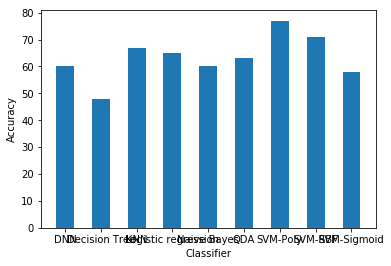

In [500]:
import matplotlib.pyplot as plt
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.bar(classifier,accuracies,width=0.5,align='center')


In [501]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [502]:
x_train=X[:900]
y_train=Y[:900]
x_test=X[900:]
y_test=Y[900:]


In [503]:
clf=SVC(C=1000,kernel='poly')

In [504]:
score=cross_val_score(clf,X,Y,cv=10)

In [505]:
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


0.64

In [506]:
pred=clf.predict(x_test)
pred

array([4, 1, 2, 4, 1, 4, 6, 5, 5, 6, 6, 6, 1, 5, 3, 5, 5, 4, 2, 0, 7, 0,
       5, 7, 7, 2, 2, 8, 7, 5, 4, 1, 0, 0, 5, 2, 8, 7, 2, 5, 9, 3, 6, 1,
       4, 0, 9, 2, 0, 3, 3, 7, 1, 7, 2, 6, 1, 2, 3, 9, 8, 5, 4, 5, 2, 1,
       1, 3, 3, 7, 9, 6, 3, 0, 3, 3, 7, 0, 9, 6, 0, 1, 0, 4, 8, 3, 5, 2,
       1, 8, 8, 7, 5, 3, 2, 2, 9, 8, 0, 9])

In [507]:
cm=metrics.confusion_matrix(y_test,pred)

In [508]:
y_test

array([4, 1, 0, 9, 1, 7, 4, 5, 5, 6, 6, 6, 1, 5, 3, 5, 5, 4, 5, 4, 7, 0,
       6, 8, 7, 2, 7, 8, 3, 5, 0, 1, 5, 2, 5, 2, 8, 7, 2, 5, 9, 9, 6, 1,
       3, 0, 8, 2, 0, 0, 9, 7, 1, 3, 9, 6, 1, 2, 3, 9, 8, 5, 4, 5, 0, 1,
       1, 6, 3, 3, 6, 6, 4, 9, 2, 2, 7, 0, 9, 6, 0, 1, 6, 3, 2, 3, 5, 2,
       1, 4, 4, 7, 5, 3, 7, 2, 9, 5, 0, 8])

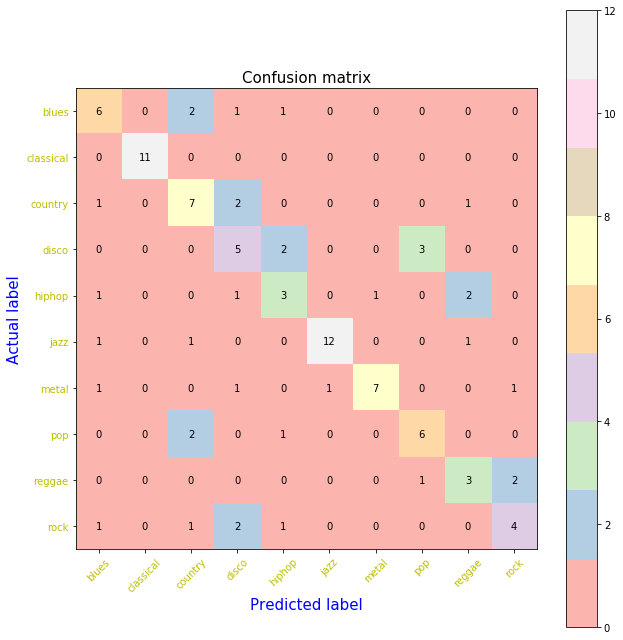

In [514]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], rotation=45, size = 10,color='y')
plt.yticks(tick_marks, ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], size = 10,color='y')
plt.tight_layout()
plt.ylabel('Actual label', size = 15,color='b')
plt.xlabel('Predicted label', size = 15,color='b')
width, height = cm.shape
for x in  range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

